## Prediction of Autism Spectrum Disorder (ASD) in children (age < 13) using Machine Learning

### Goal: Develop a Minimum Viable Product (MVP) using classical machine learning models on the QChat-10 datasets

#### Description:
The QChat-10 dataset is formed by merging using 6 datasets that we have (kaggle-Saudi, Kaggle-Toddler, UCI-child/adult/adolescent and behavioural datasets. Additionally, erroneous rows from github-behavioral have been removed. The erroneous consecutive rows(2566 - 2789) had only 0 values for A1 to A9 columns even though the final classification was either ASD positive/negative (courtesy, Rukshar Alam, Data and EDA Team)

https://drive.google.com/file/d/1WkkUso_D5usrsOfxwWbrz7XsxZ6U7wXs/view

#### Evaluation:
The primary evaluation metric is the F1-Score. The auxiliary metrics used are Accuracy, Precision, Recall, and ROC-AUC.

#### Setup

Importing essential libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,7)
import seaborn as sns
#sns.set_theme(style= 'whitegrid')

%matplotlib inline

In [2]:
# Use the intel implementation of scikit-learn package
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
# Suppress warning
import warnings
warnings.filterwarnings("ignore")

# Enable code autocompletion
%config Completer.use_jedi = False

In [4]:
# Initialization of random state parameter (seed) in estimators and CV splitters
seed= 12345

#### Loading the merged dataset

In [5]:
df= pd.read_csv("./autism_merged_dataset2.csv")
print(df.shape)

(3539, 21)


#### Exploratory Data Analysis and Feature Engineering

In [6]:
df.head()

,Age,Gender,Country,Ethnicity,testAdmin,A10,A9,A8,A7,A6,...,A4,A3,A2,A1,screeningScore,familyHistory,Jaundice,Source,Group,ASD
0,32.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,1,1,...,0,0,0,0,3,0,NaN,Kaggle-Saudi Arabia,Adult,0
1,30.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,0,0,...,0,1,0,0,3,0,NaN,Kaggle-Saudi Arabia,Adult,0
2,36.0,0,Saudi Arabia,Middle Eastern,Family Member,0,0,0,1,0,...,0,0,0,0,1,0,NaN,Kaggle-Saudi Arabia,Adult,0
3,36.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,0,1,NaN,Kaggle-Saudi Arabia,Adult,0
4,36.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,0,0,NaN,Kaggle-Saudi Arabia,Adult,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3535 non-null   float64
 1   Gender          3539 non-null   int64  
 2   Country         1549 non-null   object 
 3   Ethnicity       3398 non-null   object 
 4   testAdmin       3398 non-null   object 
 5   A10             3539 non-null   int64  
 6   A9              3539 non-null   int64  
 7   A8              3539 non-null   int64  
 8   A7              3539 non-null   int64  
 9   A6              3539 non-null   int64  
 10  A5              3539 non-null   int64  
 11  A4              3539 non-null   int64  
 12  A3              3539 non-null   int64  
 13  A2              3539 non-null   int64  
 14  A1              3539 non-null   int64  
 15  screeningScore  3539 non-null   int64  
 16  familyHistory   3539 non-null   int64  
 17  Jaundice        3078 non-null   f

* 3539 entries
* 21 columns 
* 20 features and 1 binary label (ASD)

In [8]:
# Checing for null values
df.isnull().sum()

Age                  4
Gender               0
Country           1990
Ethnicity          141
testAdmin          141
A10                  0
A9                   0
A8                   0
A7                   0
A6                   0
A5                   0
A4                   0
A3                   0
A2                   0
A1                   0
screeningScore       0
familyHistory        0
Jaundice           461
Source               0
Group                4
ASD                  0
dtype: int64

In [9]:
# List the feature names
df.columns

Index(['Age', 'Gender', 'Country', 'Ethnicity', 'testAdmin', 'A10', 'A9', 'A8',
       'A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1', 'screeningScore',
       'familyHistory', 'Jaundice', 'Source', 'Group', 'ASD'],
      dtype='object')

In [10]:
# Segregating categorical and numerical features
num_cols= ['Age','screeningScore']
cat_cols= ['Gender', 'Country', 'Ethnicity', 'testAdmin', 'A10', 'A9', 'A8','A7', 'A6', 'A5', 'A4', 'A3', 'A2', 'A1',
       'familyHistory', 'Jaundice', 'Source','Group']

In [11]:
# Convert categorical features to object type and numerical features to float64 type (to accomodate inf outliers in numerical features)
df[cat_cols]= df[cat_cols].astype('object')
df[num_cols]= df[num_cols].astype('float64')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3539 entries, 0 to 3538
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             3535 non-null   float64
 1   Gender          3539 non-null   object 
 2   Country         1549 non-null   object 
 3   Ethnicity       3398 non-null   object 
 4   testAdmin       3398 non-null   object 
 5   A10             3539 non-null   object 
 6   A9              3539 non-null   object 
 7   A8              3539 non-null   object 
 8   A7              3539 non-null   object 
 9   A6              3539 non-null   object 
 10  A5              3539 non-null   object 
 11  A4              3539 non-null   object 
 12  A3              3539 non-null   object 
 13  A2              3539 non-null   object 
 14  A1              3539 non-null   object 
 15  screeningScore  3539 non-null   float64
 16  familyHistory   3539 non-null   object 
 17  Jaundice        3078 non-null   o

In [13]:
# Filter out the rows where adults are surveyed and model the datasets for children only
df_child= df[df["Group"] == "Child"]

In [14]:
df_child.head()

,Age,Gender,Country,Ethnicity,testAdmin,A10,A9,A8,A7,A6,...,A4,A3,A2,A1,screeningScore,familyHistory,Jaundice,Source,Group,ASD
15,12.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,1,...,1,0,0,1,3.0,0,NaN,Kaggle-Saudi Arabia,Child,0
17,12.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,0,0,...,0,0,0,0,1.0,0,NaN,Kaggle-Saudi Arabia,Child,0
23,12.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,0.0,0,NaN,Kaggle-Saudi Arabia,Child,0
39,12.0,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,...,0,0,0,0,1.0,0,NaN,Kaggle-Saudi Arabia,Child,0
42,12.0,1,Saudi Arabia,Middle Eastern,Family Member,1,0,1,1,1,...,1,1,0,1,8.0,0,NaN,Kaggle-Saudi Arabia,Child,1


* The Age and Group features are redundant as we only analyse children dataset (age < 13). We remove these columns.
* We remove the Source column as it is not needed for the analysis.
* We remove the screeningScore column to avoid data leakage (from domain knowledge).

In [15]:
df_child.drop(['Age', 'Group', 'Source', 'screeningScore'], axis= 1, inplace= True)

In [16]:
df_child.head()

,Gender,Country,Ethnicity,testAdmin,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Jaundice,ASD
15,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,1,0,1,0,0,1,0,NaN,0
17,1,Saudi Arabia,Middle Eastern,Family Member,0,0,1,0,0,0,0,0,0,0,0,NaN,0
23,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,0,0,0,0,0,0,NaN,0
39,1,Saudi Arabia,Middle Eastern,Family Member,0,0,0,0,0,1,0,0,0,0,0,NaN,0
42,1,Saudi Arabia,Middle Eastern,Family Member,1,0,1,1,1,1,1,1,0,1,0,NaN,1


In [17]:
df_child.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2016 entries, 15 to 3538
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Gender         2016 non-null   object
 1   Country        350 non-null    object
 2   Ethnicity      1976 non-null   object
 3   testAdmin      1976 non-null   object
 4   A10            2016 non-null   object
 5   A9             2016 non-null   object
 6   A8             2016 non-null   object
 7   A7             2016 non-null   object
 8   A6             2016 non-null   object
 9   A5             2016 non-null   object
 10  A4             2016 non-null   object
 11  A3             2016 non-null   object
 12  A2             2016 non-null   object
 13  A1             2016 non-null   object
 14  familyHistory  2016 non-null   object
 15  Jaundice       1975 non-null   object
 16  ASD            2016 non-null   int64 
dtypes: int64(1), object(16)
memory usage: 283.5+ KB


* After data cleaning, we have 2016 entries
* 16 features (A1-A10, Gender, Country, Ethnicity, testAdmin, familyHistory, Jaundice) and 1 binary label (ASD)

#### Class Label (ASD) distribution

Let us check how the class labels are distributed

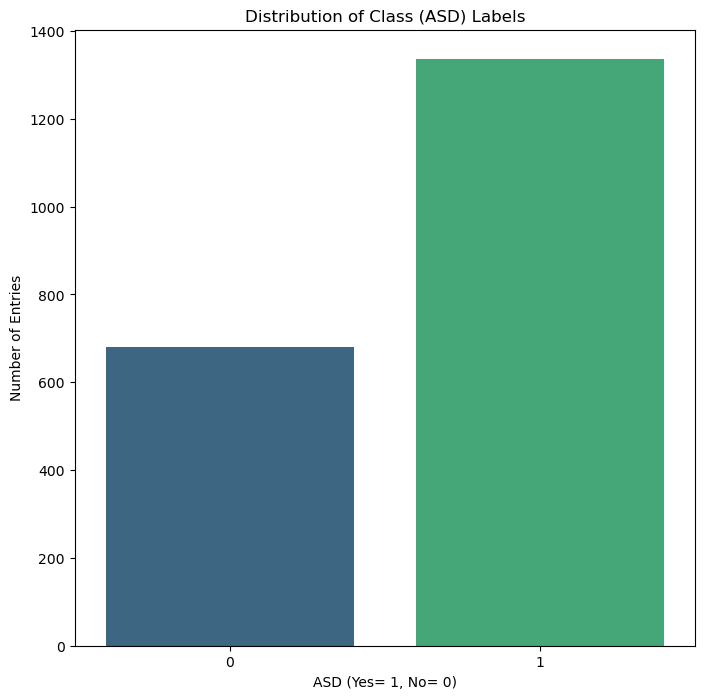

In [18]:
plt.figure(figsize= (8,8))

# plotting the counts of each binary class label
sns.countplot(data= df_child, x= 'ASD', palette= 'viridis')

plt.title('Distribution of Class (ASD) Labels')
plt.xlabel('ASD (Yes= 1, No= 0)')
plt.ylabel('Number of Entries')
plt.show()

In [19]:
ASD_1= (df_child['ASD'] == 1).sum()/df_child.shape[0]
ASD_0= (df_child['ASD'] == 0).sum()/df_child.shape[0]

print("Percentage of neurodivergent children (are predicted to be autistic): ", round(ASD_1*100,2))
print("Percentage of neurotypical children (are not predicted to be autistic): ", round(ASD_0*100, 2))

Percentage of neurodivergent children (are predicted to be autistic):  66.27
Percentage of neurotypical children (are not predicted to be autistic):  33.73


* 66.27 $\%$ surveyed are neurodivergent and 33.73 $\%$ are neurotypical.
* There is class imbalance in the dataset (We need to use oversampling techniques).

#### Features and Types

In [20]:
df_child.dtypes.value_counts()

object    16
int64      1
dtype: int64

In [21]:
# Put categorical feature names in col list
cols= df_child.select_dtypes(include= 'object').columns.to_list()
cols

['Gender',
 'Country',
 'Ethnicity',
 'testAdmin',
 'A10',
 'A9',
 'A8',
 'A7',
 'A6',
 'A5',
 'A4',
 'A3',
 'A2',
 'A1',
 'familyHistory',
 'Jaundice']

In [22]:
# Check for null/missing values
df_child[cols].isnull().sum()

Gender              0
Country          1666
Ethnicity          40
testAdmin          40
A10                 0
A9                  0
A8                  0
A7                  0
A6                  0
A5                  0
A4                  0
A3                  0
A2                  0
A1                  0
familyHistory       0
Jaundice           41
dtype: int64

In [23]:
print("Percentage of missing values in Country column: ", round(df_child['Country'].isnull().sum()/df_child.shape[0]*100, 2))
print("Percentage of missing values in Ethnicity column: ", round(df_child['Ethnicity'].isnull().sum()/df_child.shape[0]*100, 2))
print("Percentage of missing values in testAdmin column: ", round(df_child['testAdmin'].isnull().sum()/df_child.shape[0]*100, 2))
print("Percentage of missing values in Jaundice column: ", round(df_child['Jaundice'].isnull().sum()/df_child.shape[0]*100, 2))

Percentage of missing values in Country column:  82.64
Percentage of missing values in Ethnicity column:  1.98
Percentage of missing values in testAdmin column:  1.98
Percentage of missing values in Jaundice column:  2.03


82.64 $%$ of entries in Country column is missing. Therefore we drop this feature.

We will impute the missing values of Ethnicity, testAdmin, and Jaundice features with the most frequent entries of their respective columns.

In [24]:
df_child.drop(["Country"], axis= 1, inplace= True)

In [25]:
df_child.head()

,Gender,Ethnicity,testAdmin,A10,A9,A8,A7,A6,A5,A4,A3,A2,A1,familyHistory,Jaundice,ASD
15,1,Middle Eastern,Family Member,0,0,0,0,1,0,1,0,0,1,0,NaN,0
17,1,Middle Eastern,Family Member,0,0,1,0,0,0,0,0,0,0,0,NaN,0
23,1,Middle Eastern,Family Member,0,0,0,0,0,0,0,0,0,0,0,NaN,0
39,1,Middle Eastern,Family Member,0,0,0,0,0,1,0,0,0,0,0,NaN,0
42,1,Middle Eastern,Family Member,1,0,1,1,1,1,1,1,0,1,0,NaN,1


Descriptive Statistics of Features

In [26]:
# Put categorical feature names in col list
cols= df_child.select_dtypes(include= 'object').columns.to_list()
cols

['Gender',
 'Ethnicity',
 'testAdmin',
 'A10',
 'A9',
 'A8',
 'A7',
 'A6',
 'A5',
 'A4',
 'A3',
 'A2',
 'A1',
 'familyHistory',
 'Jaundice']

In [27]:
df_child[cols].describe().T

,count,unique,top,freq
Gender,2016,2,0,1490
Ethnicity,1976,12,White European,643
testAdmin,1976,7,Family Member,1277
A10,2016,2,1,1222
A9,2016,2,0,1038
A8,2016,2,0,1079
A7,2016,2,1,1298
A6,2016,2,1,1189
A5,2016,2,1,1125
A4,2016,2,1,1050


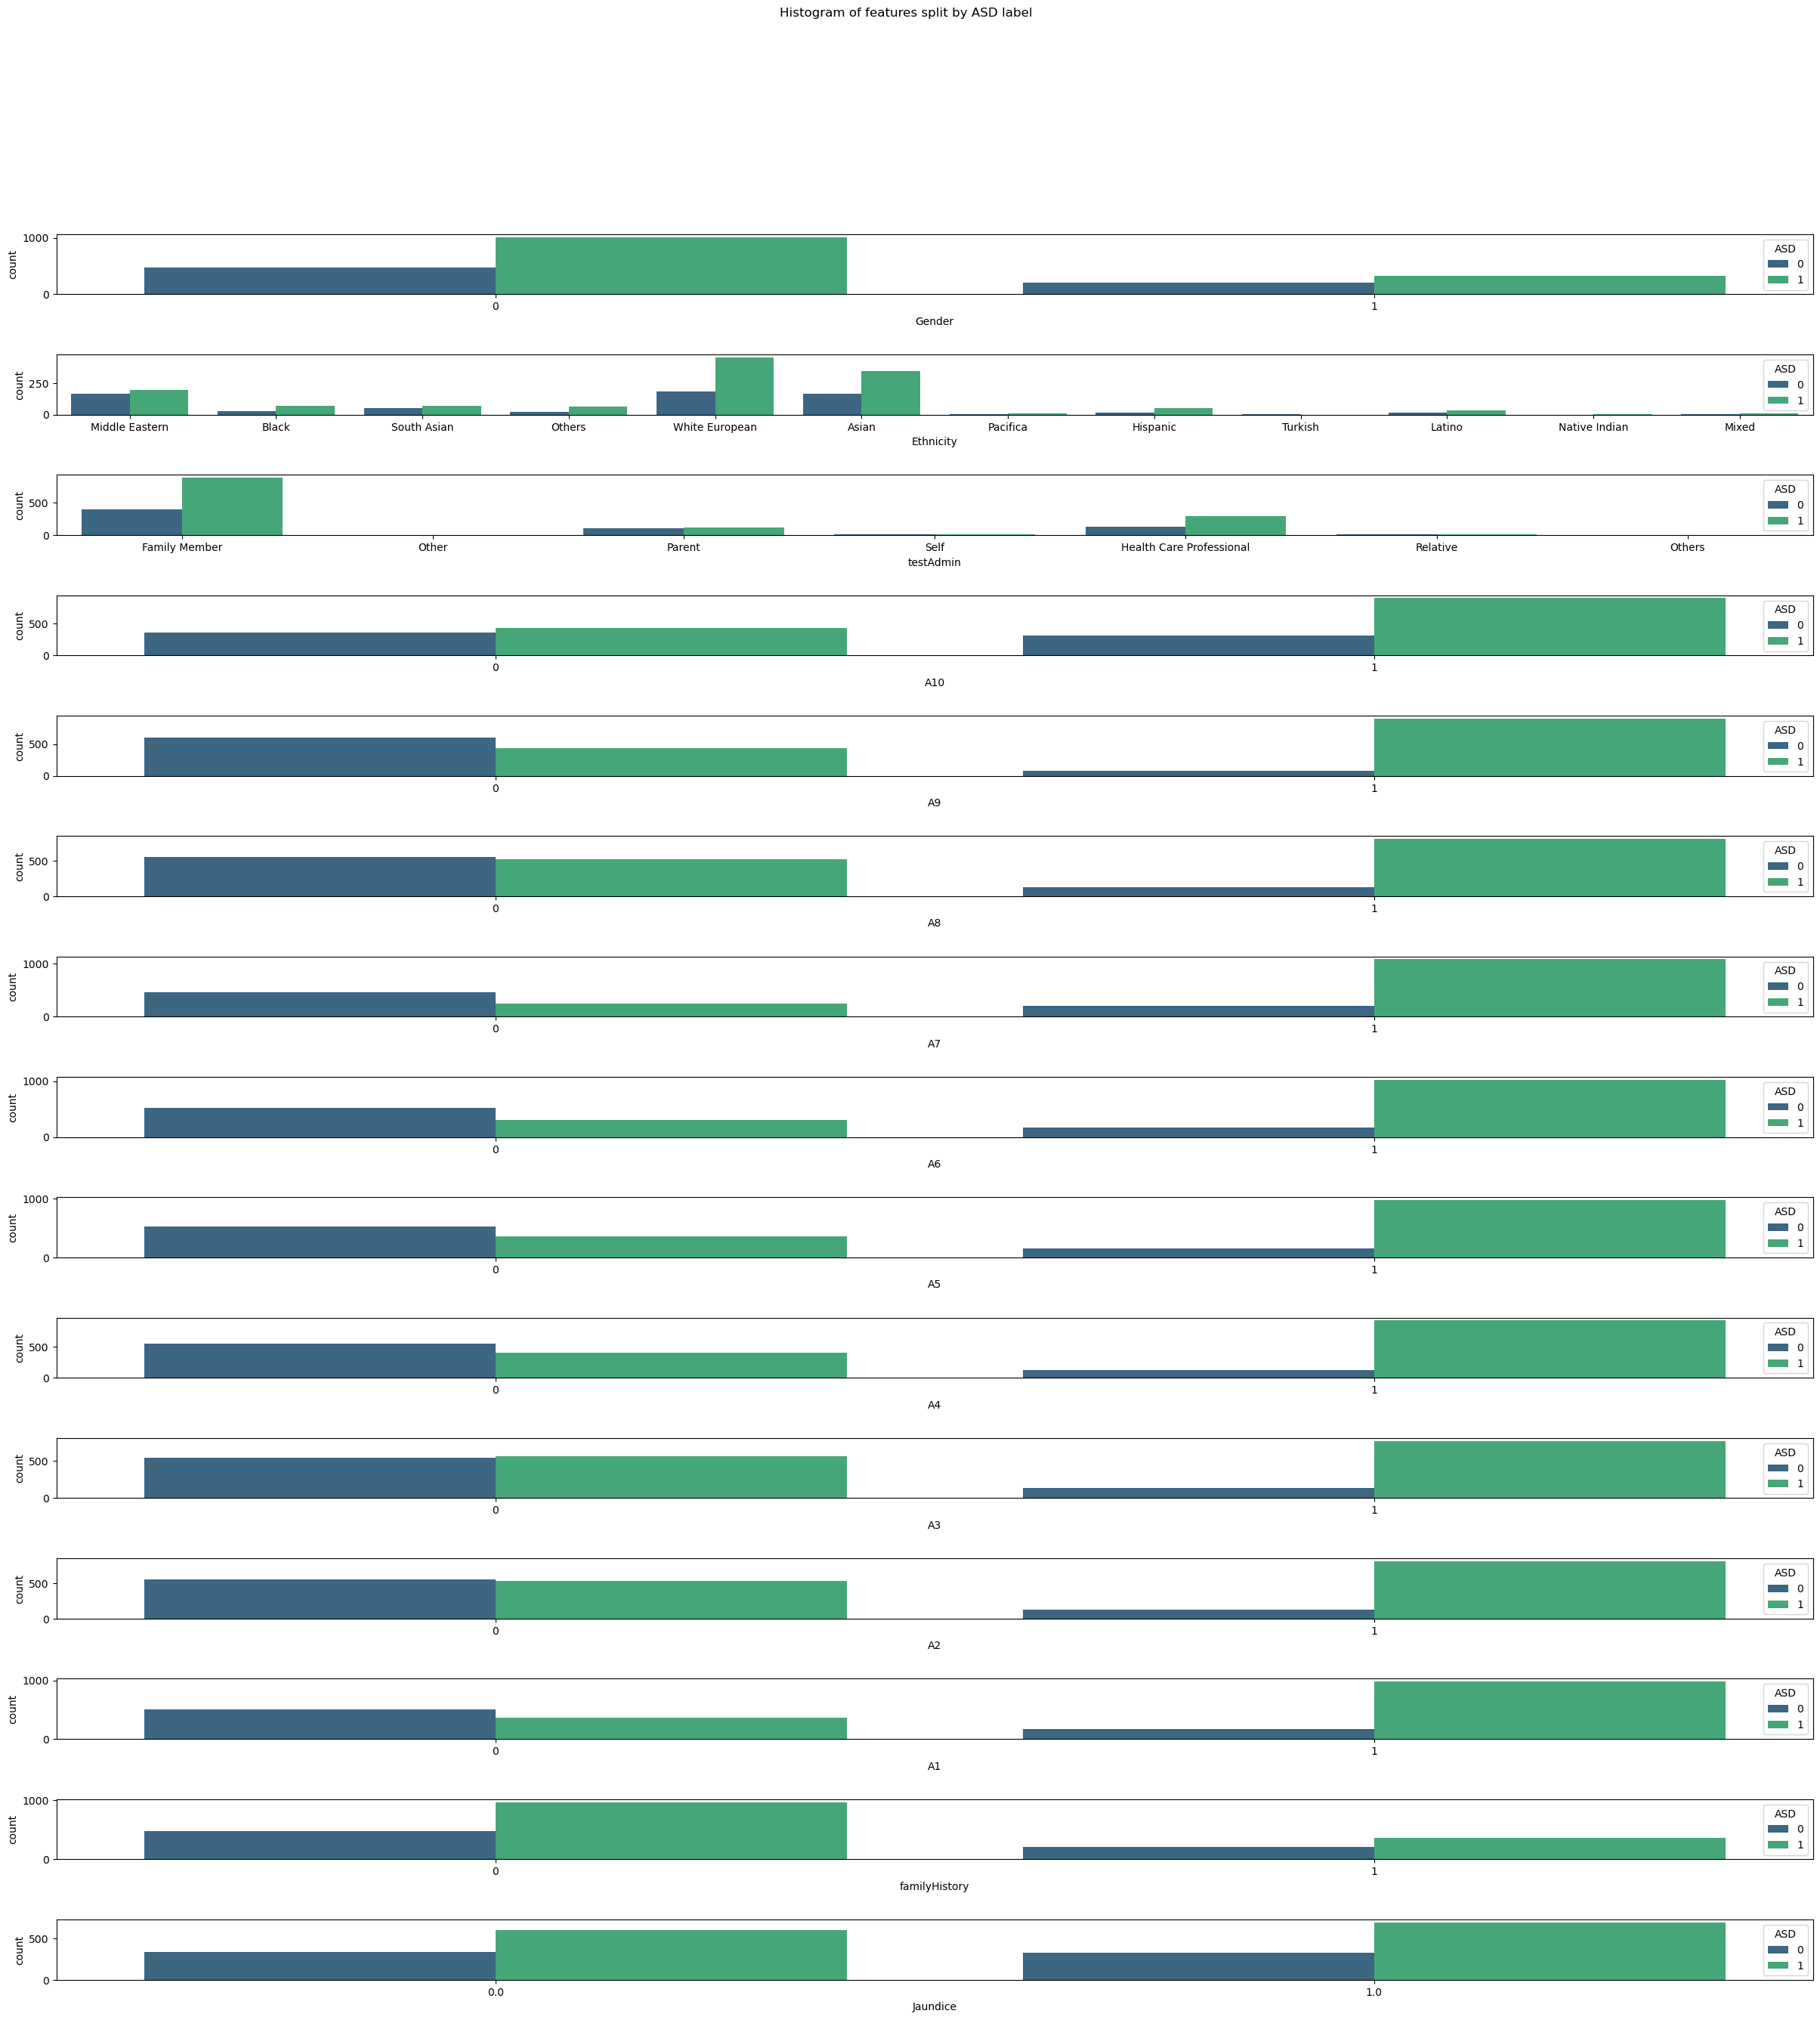

In [28]:
# Counts of unique values of categorical features
fig = plt.subplots(figsize=(30, 30))

for i, feature in enumerate(cols):
    ax = plt.subplot(len(cols), 1, i+1)
    sns.countplot(data=df_child, x=feature, hue= df_child['ASD'], palette='viridis', ax=ax)
    #plt.xlabel('Unique values')
    #plt.xticks(rotation=45)
    #plt.title(feature)
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.suptitle("Histogram of features split by ASD label")
plt.show()

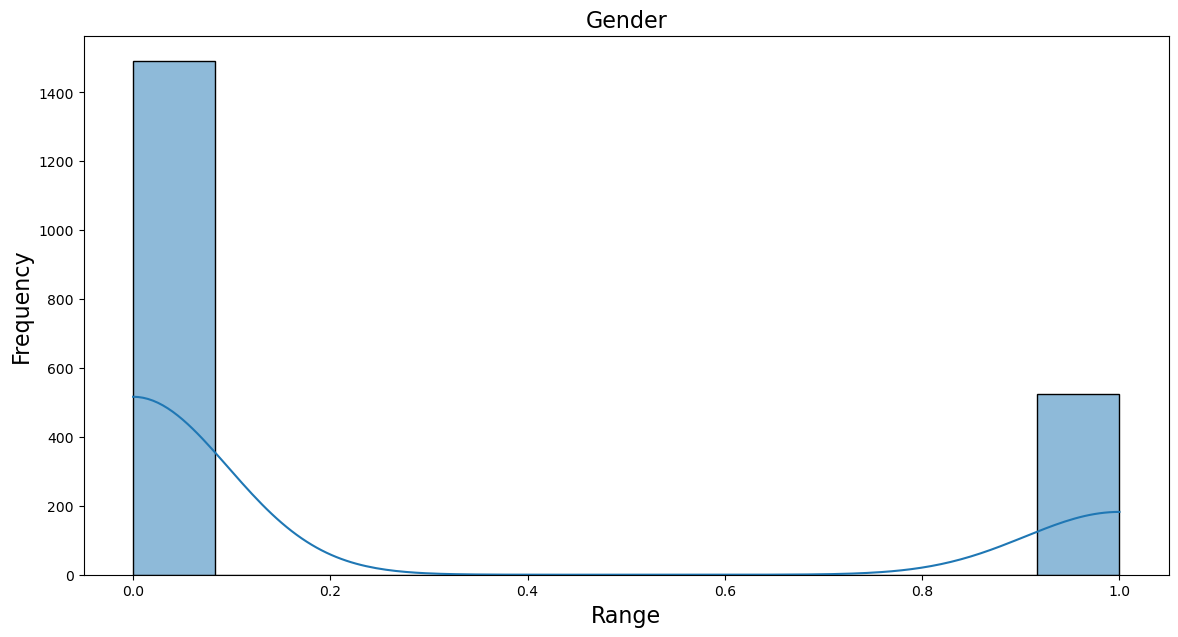

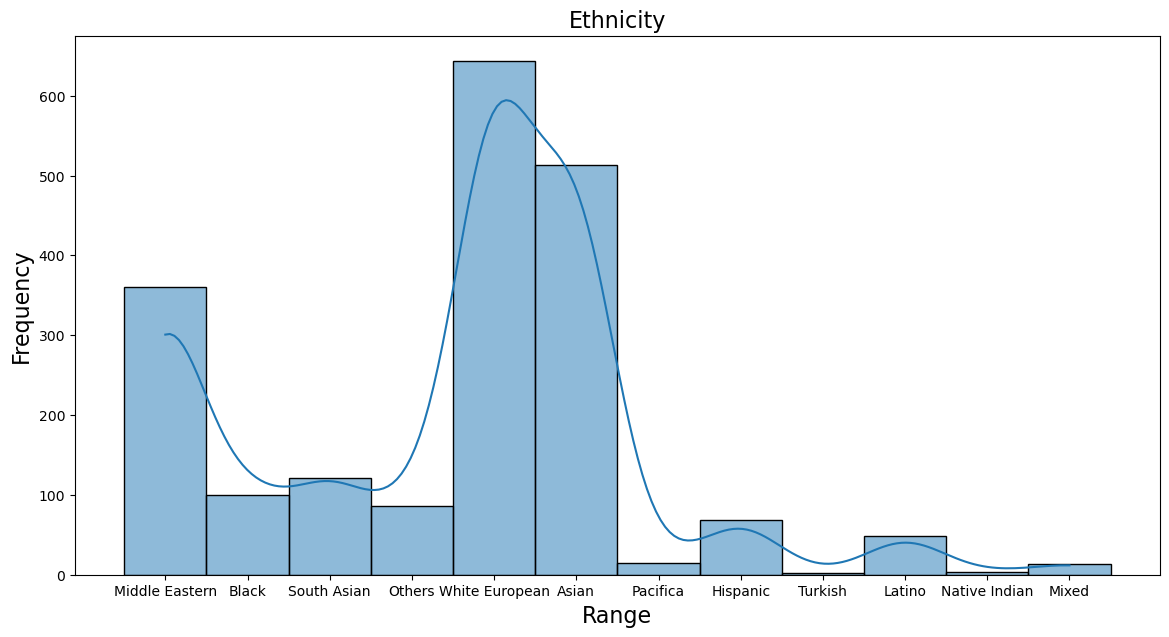

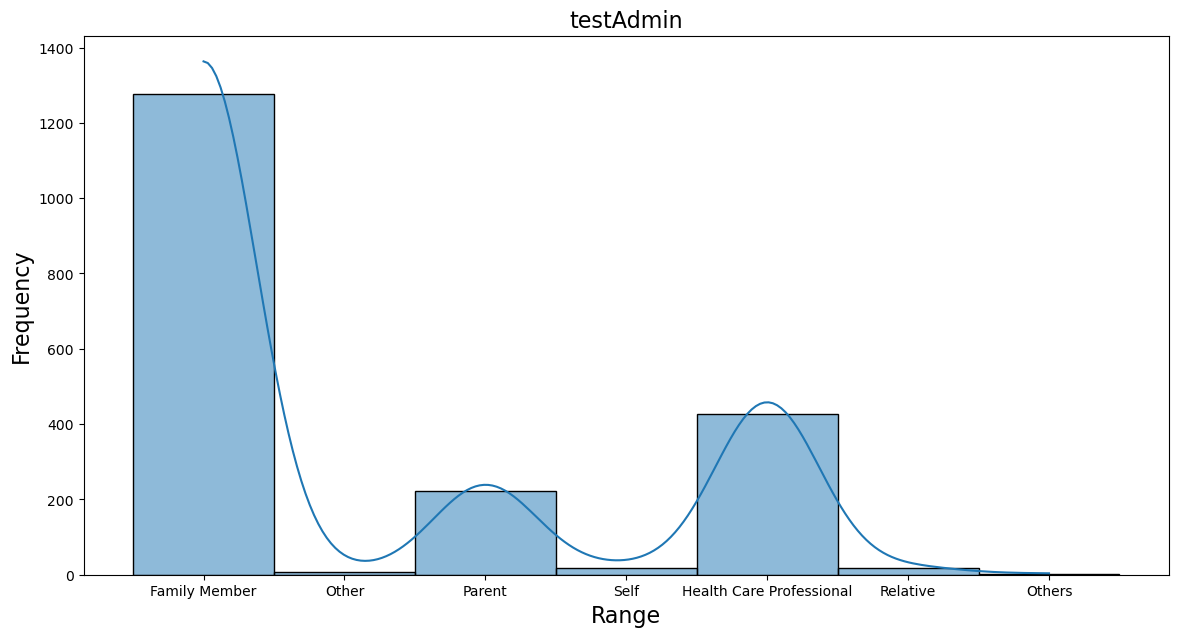

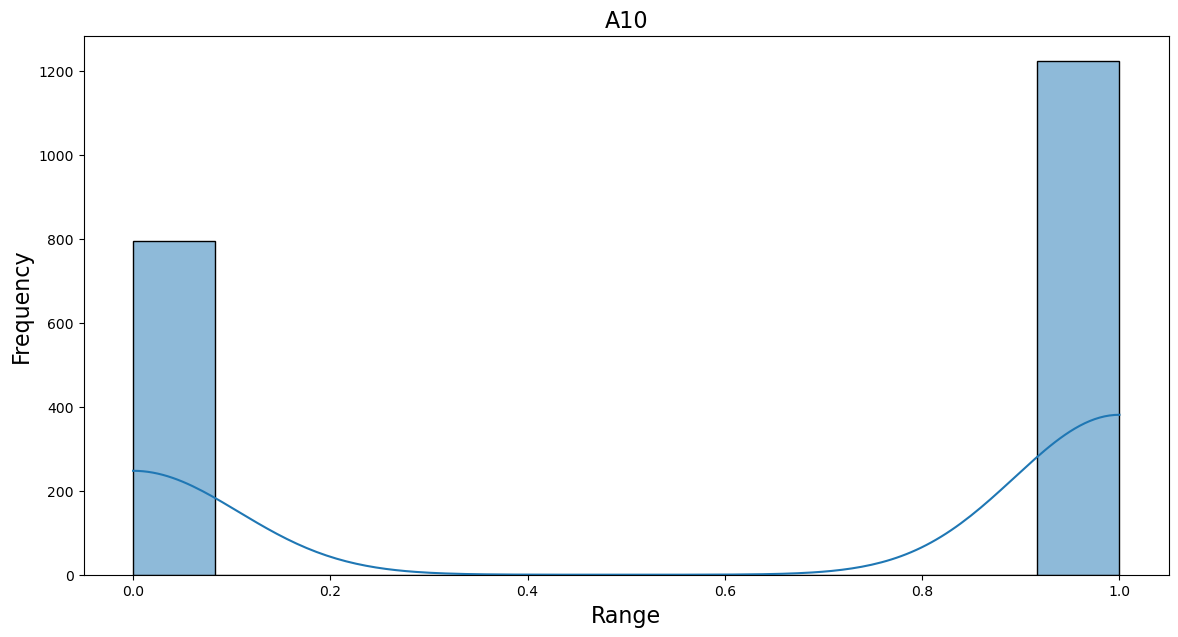

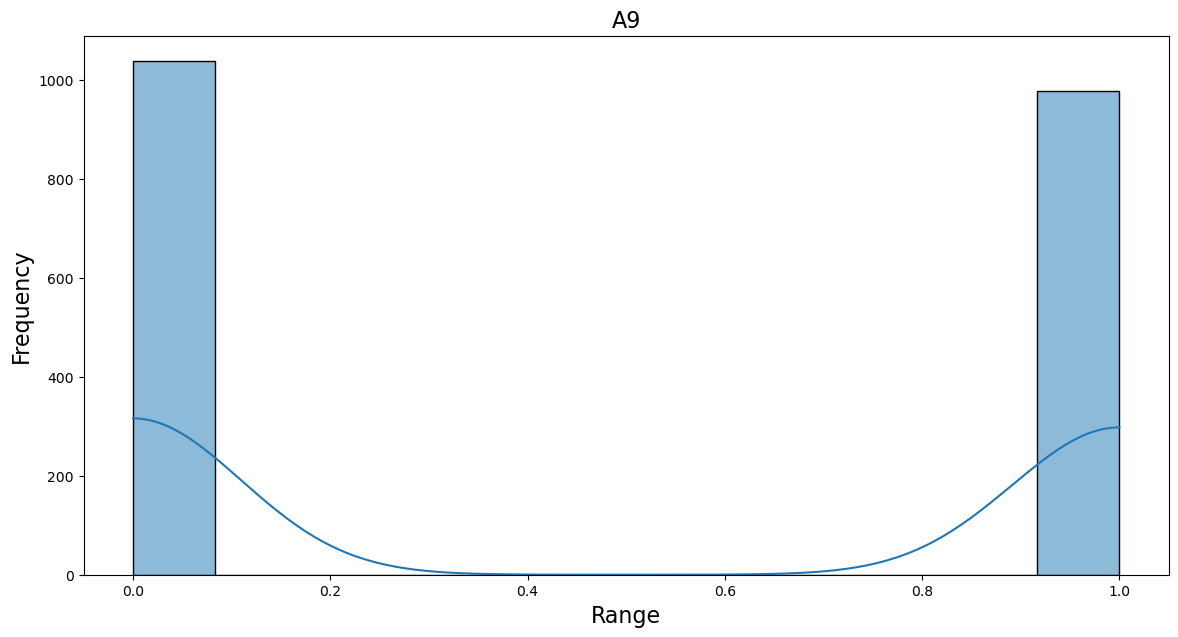

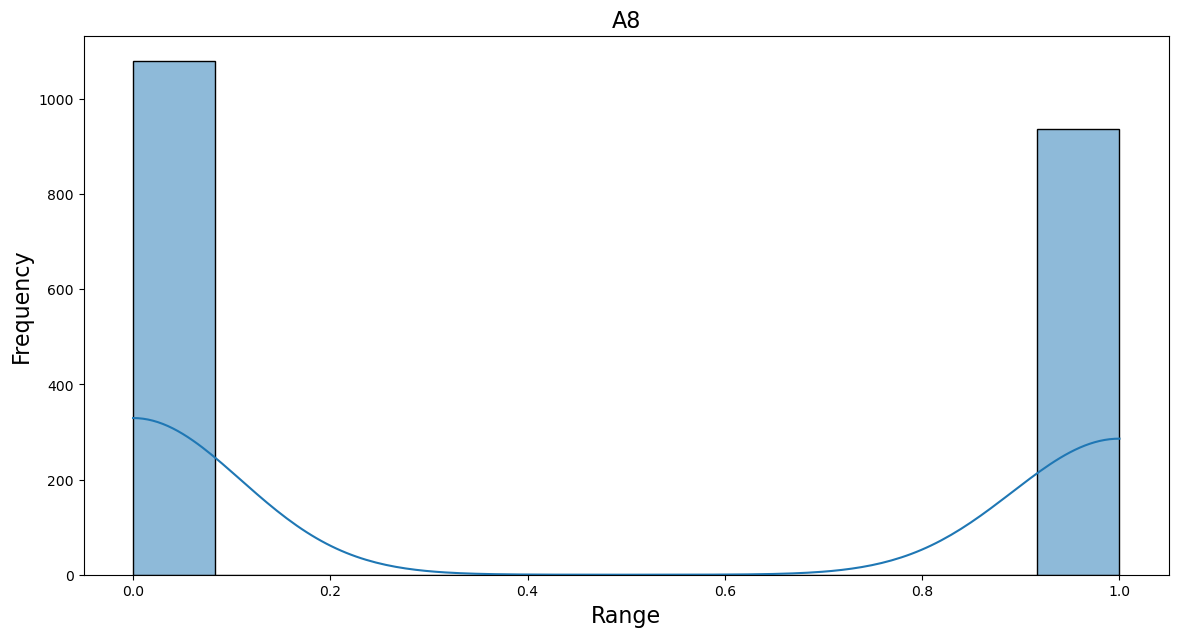

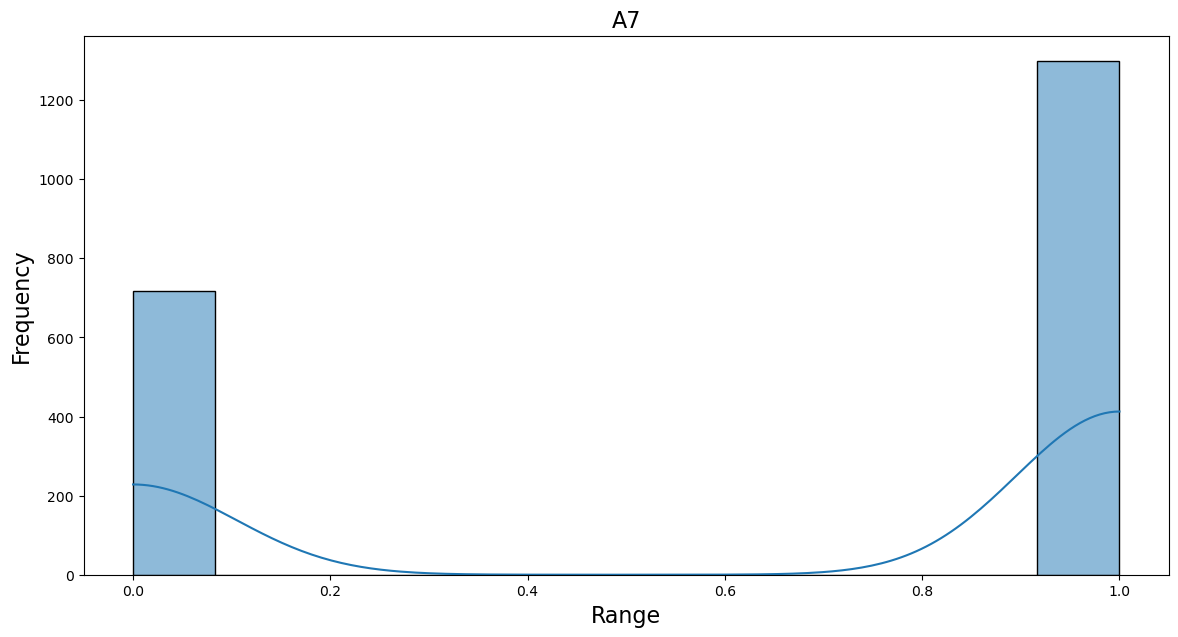

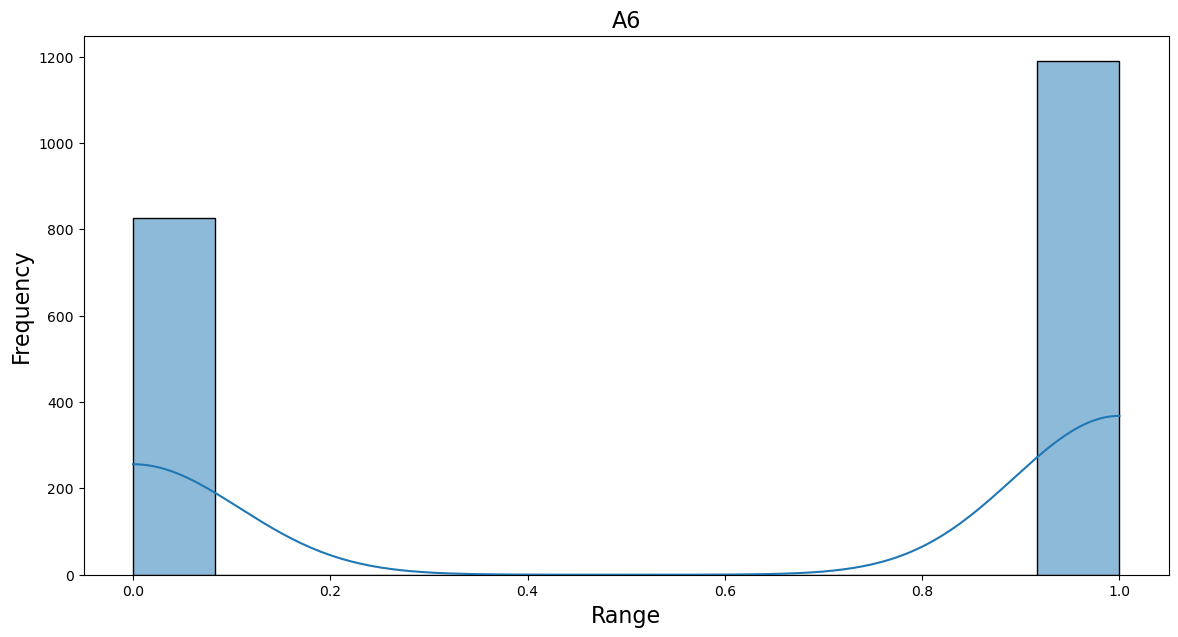

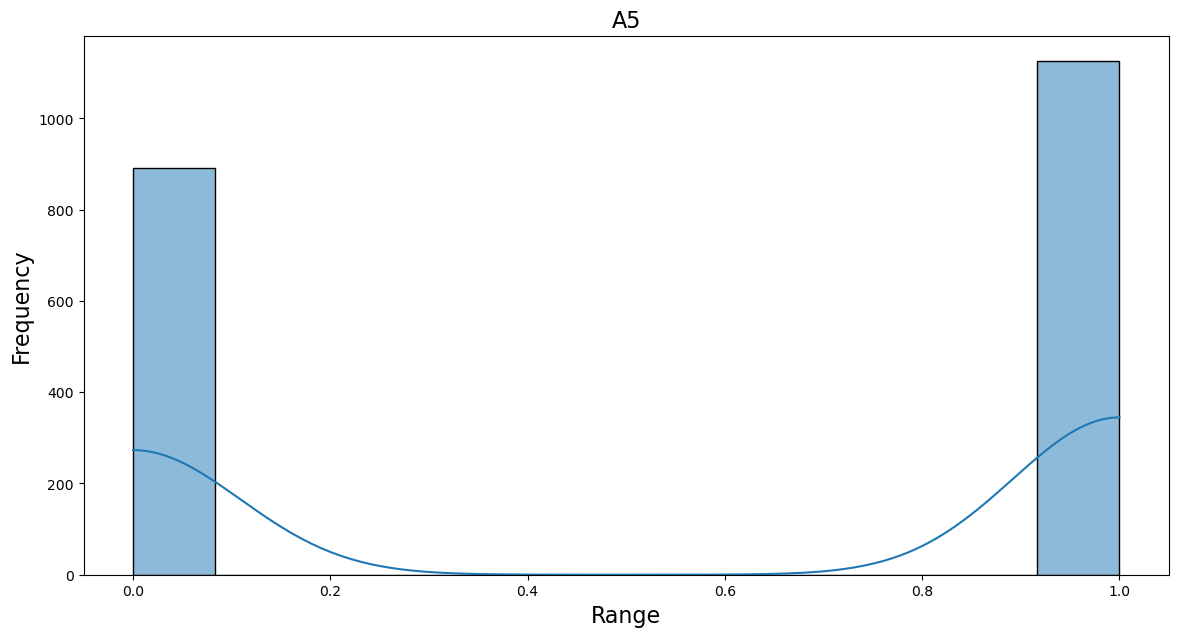

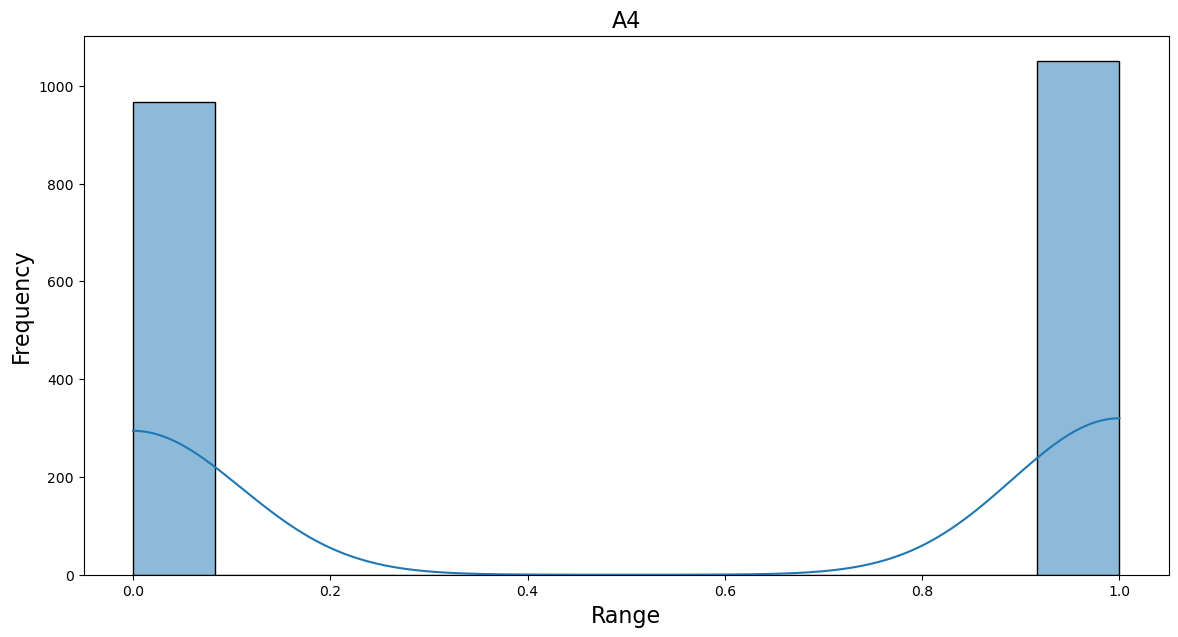

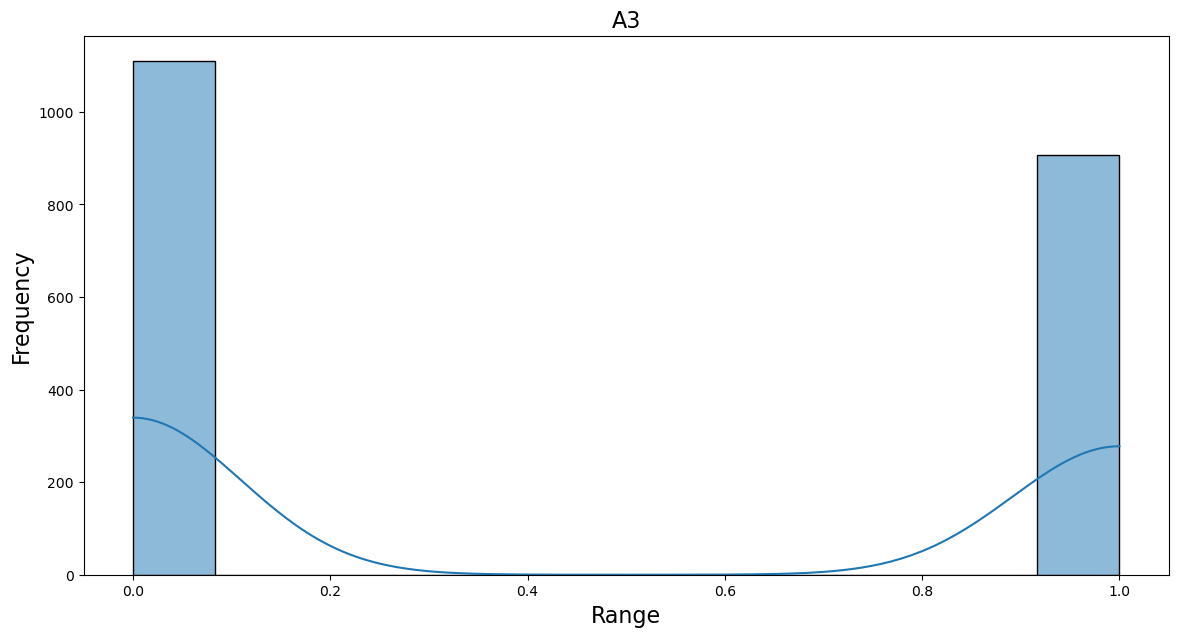

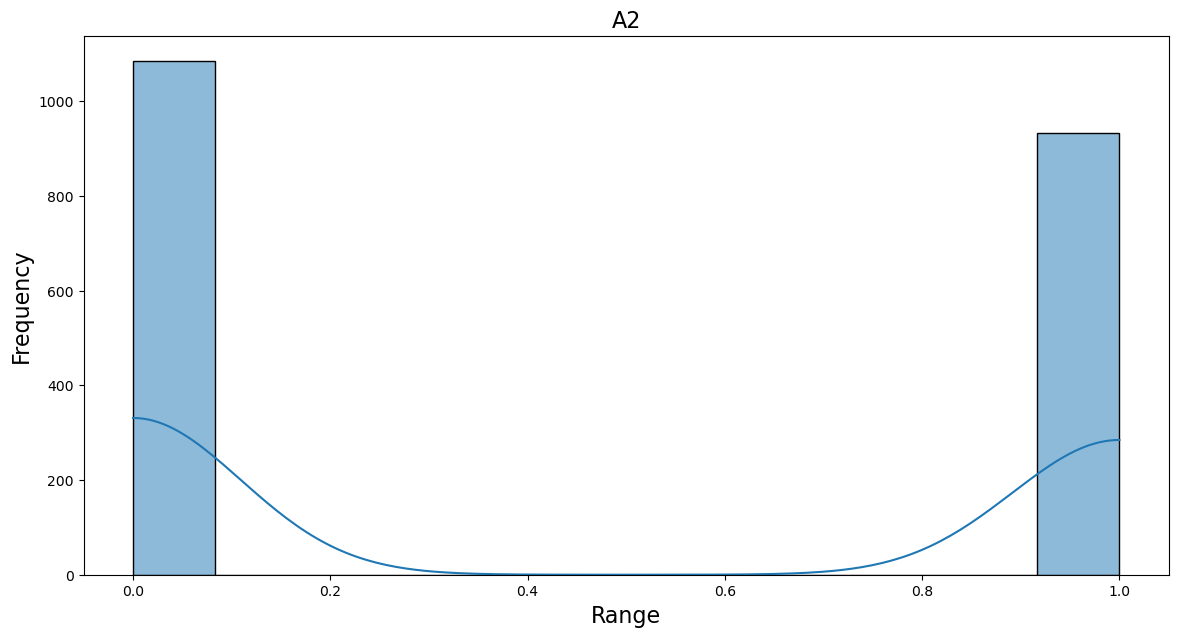

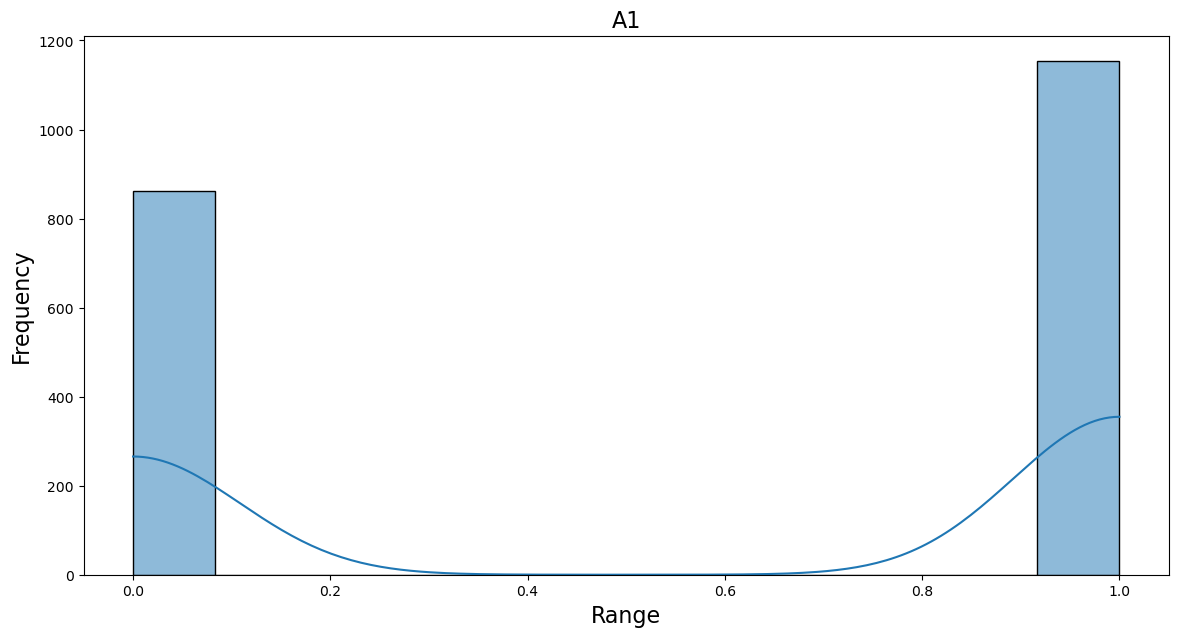

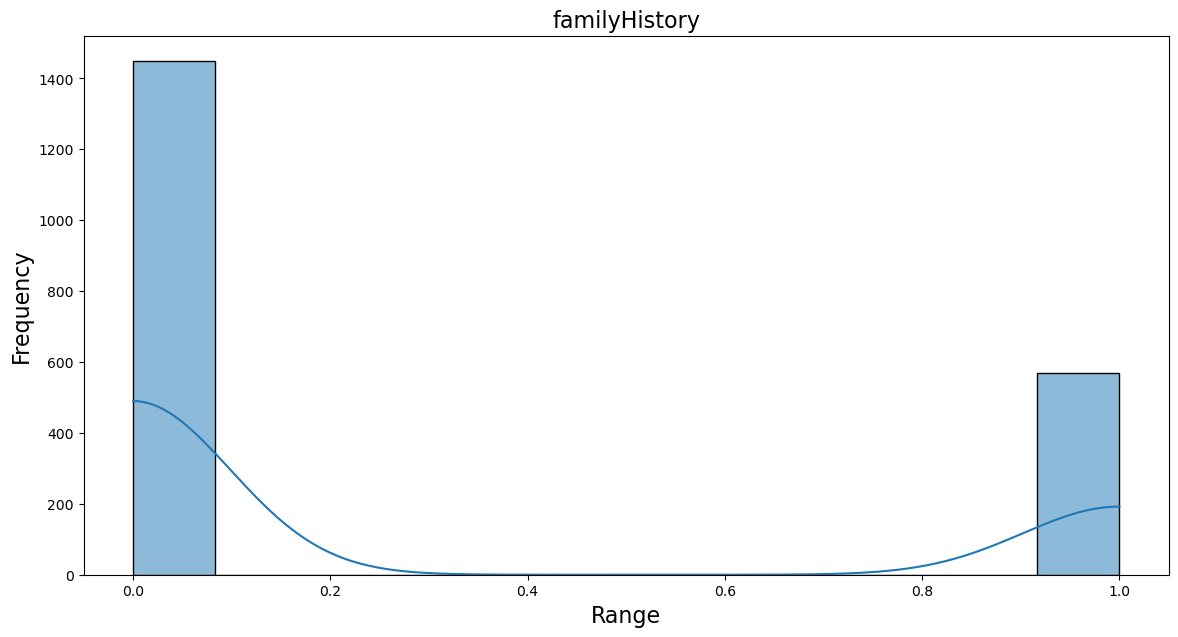

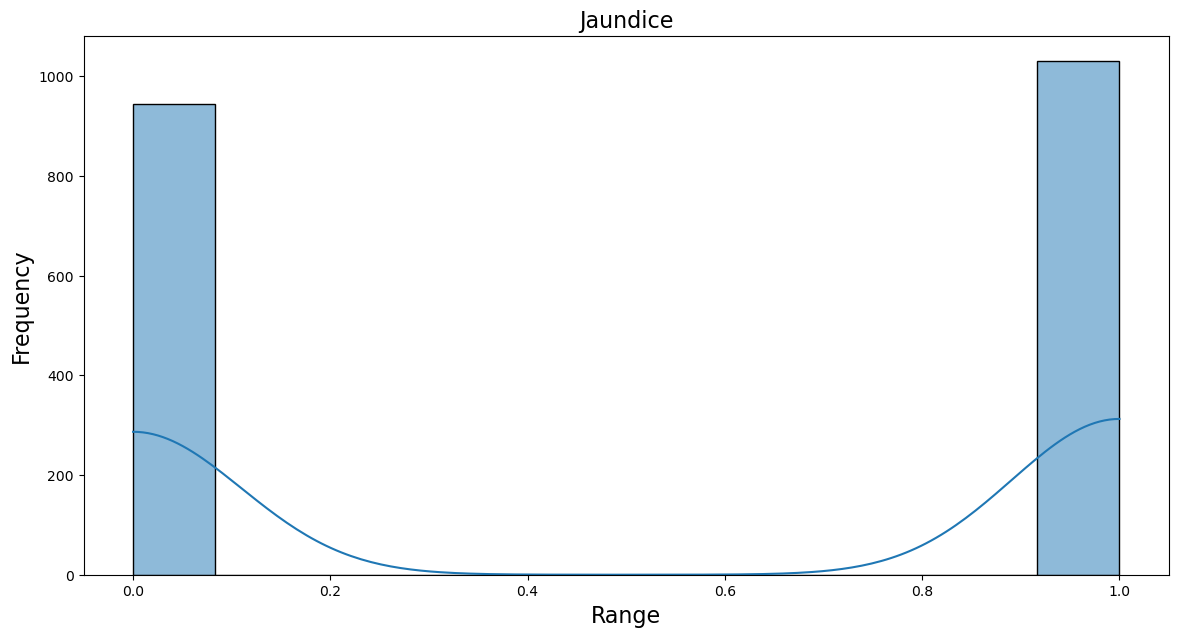

In [74]:
# Separate Histograms for categorical features

for name in cols[0: len(cols)]:
    sns.histplot(df_child[name].values, kde= True) # histogram plot
    plt.title(name, fontsize= 16)
    plt.xlabel('Range', fontsize= 16)
    plt.ylabel('Frequency', fontsize= 16)
    plt.show()

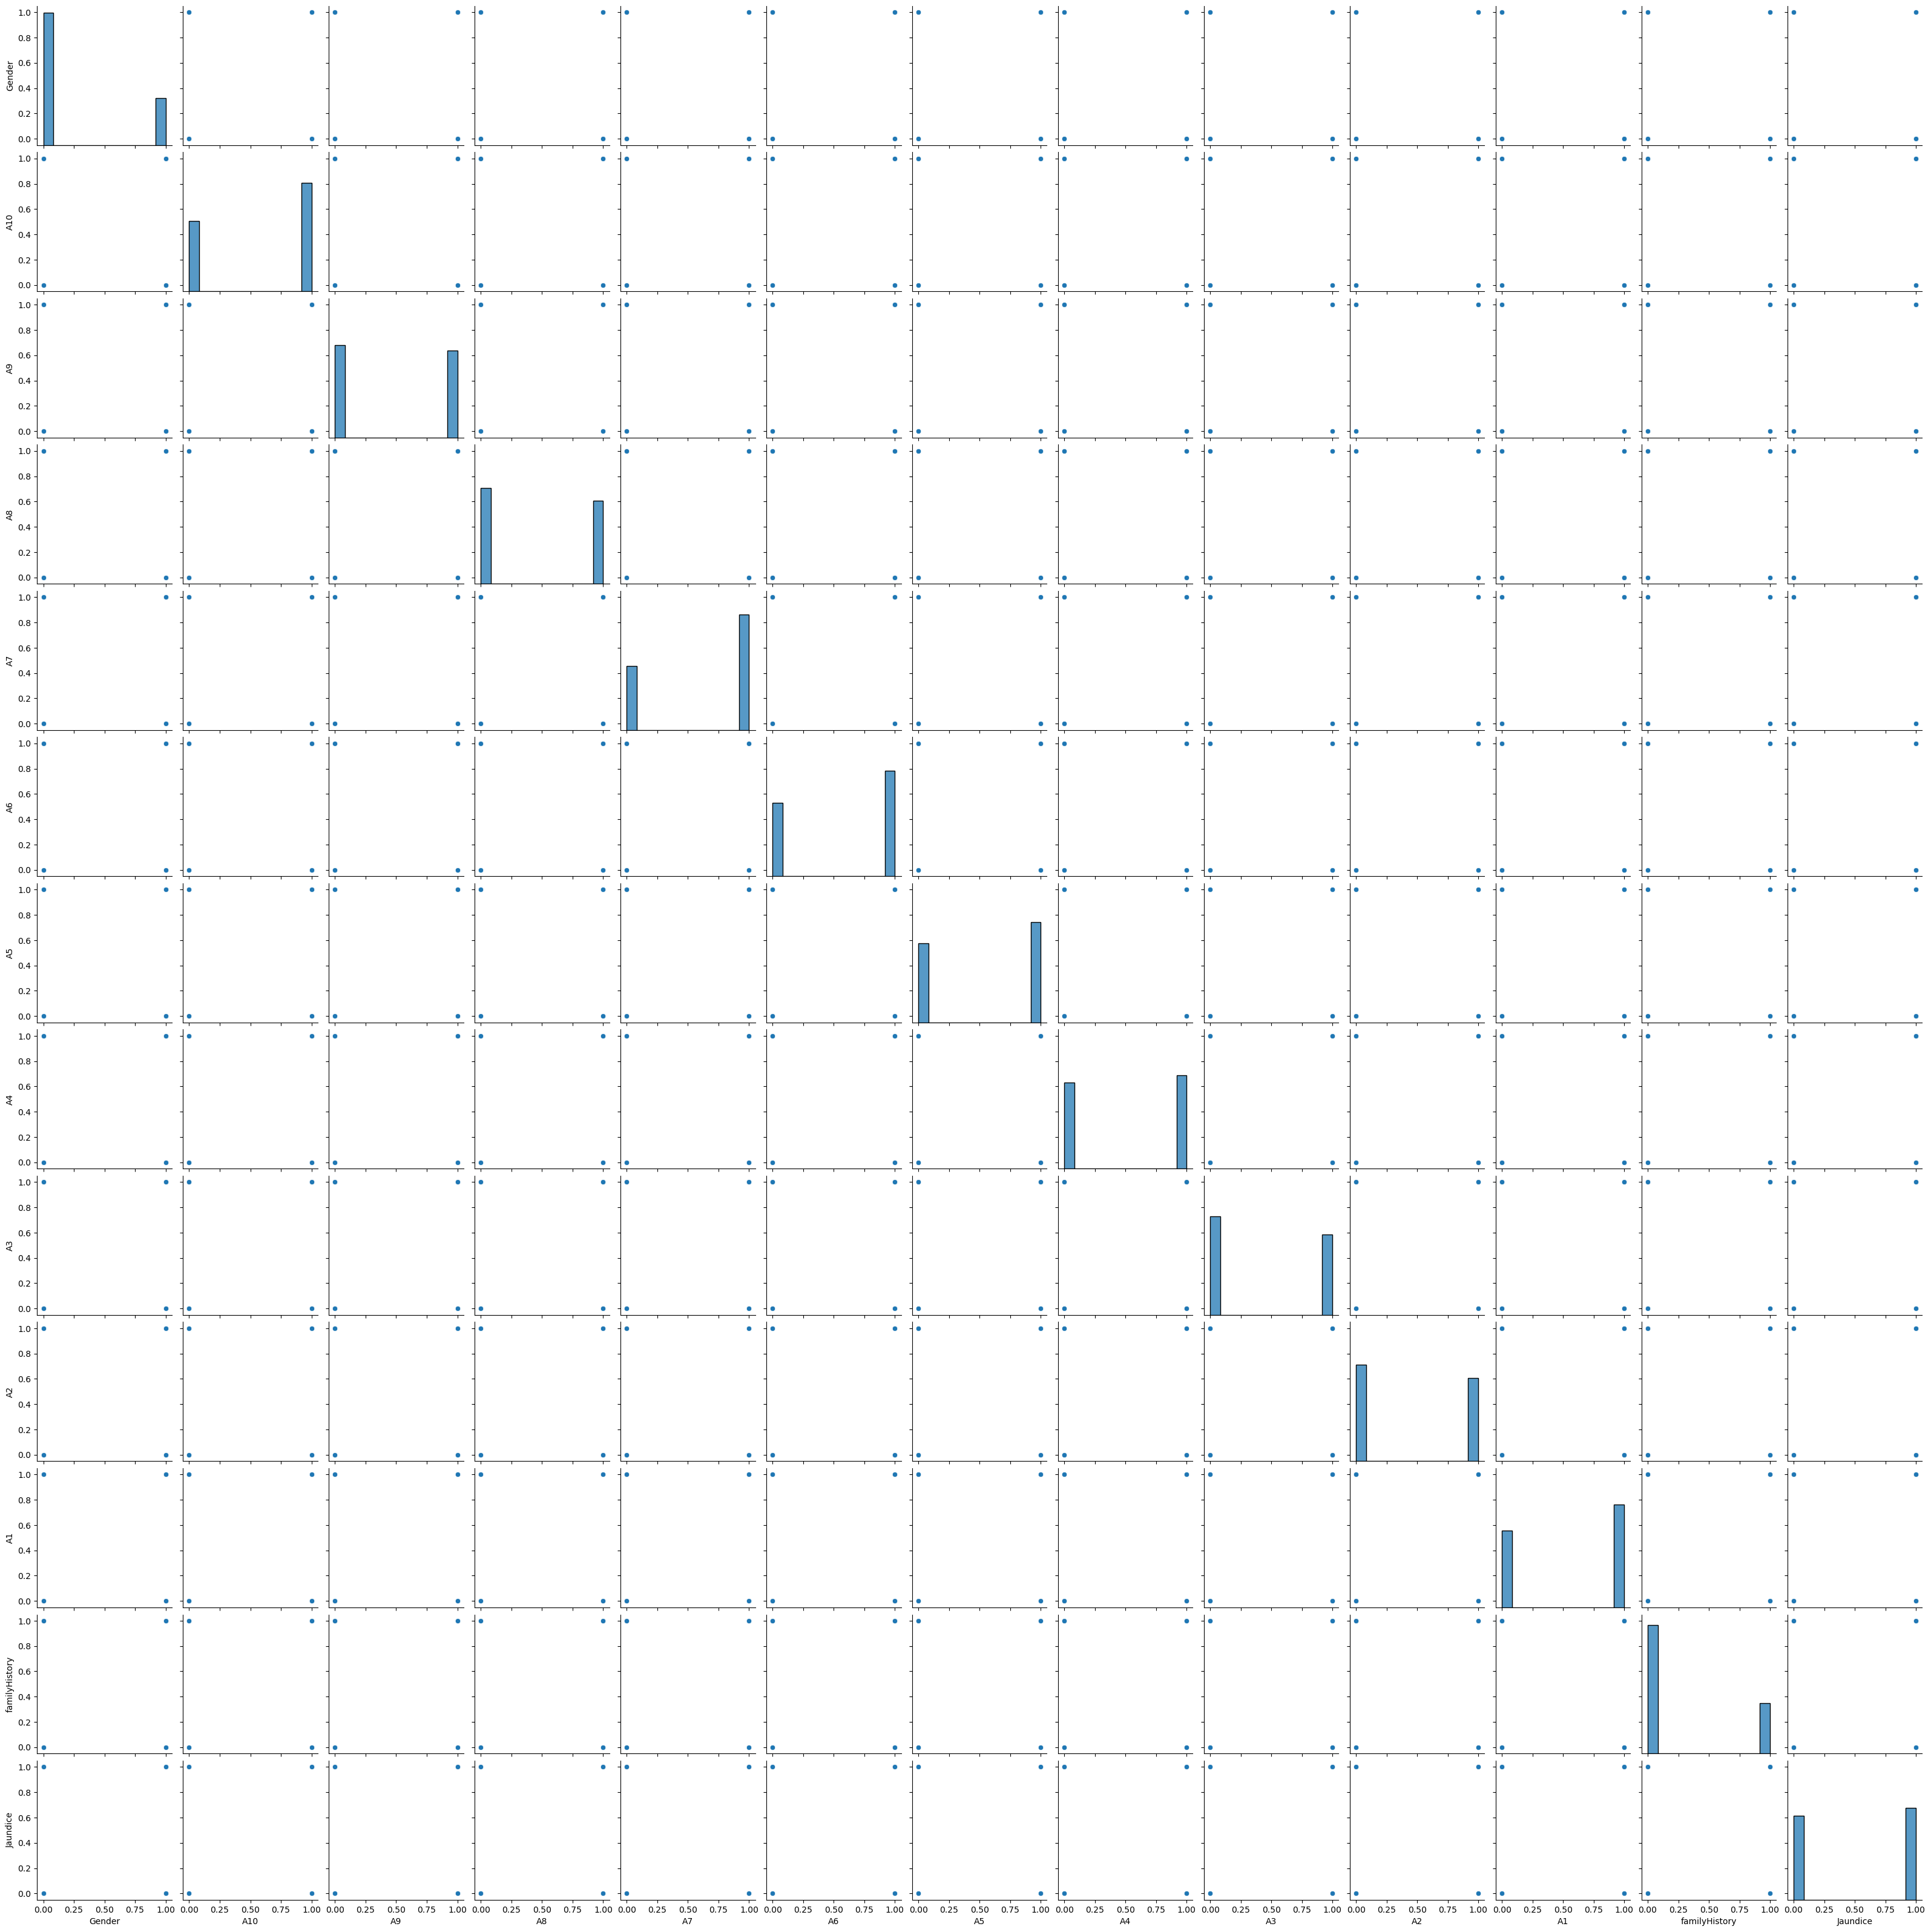

In [30]:
# Bivariate Distribution of features
sns.pairplot(df_child[cols])
plt.show()

Text(0.5, 0.92, 'Corrected Cramer’s V measure of association - Categorical Features')

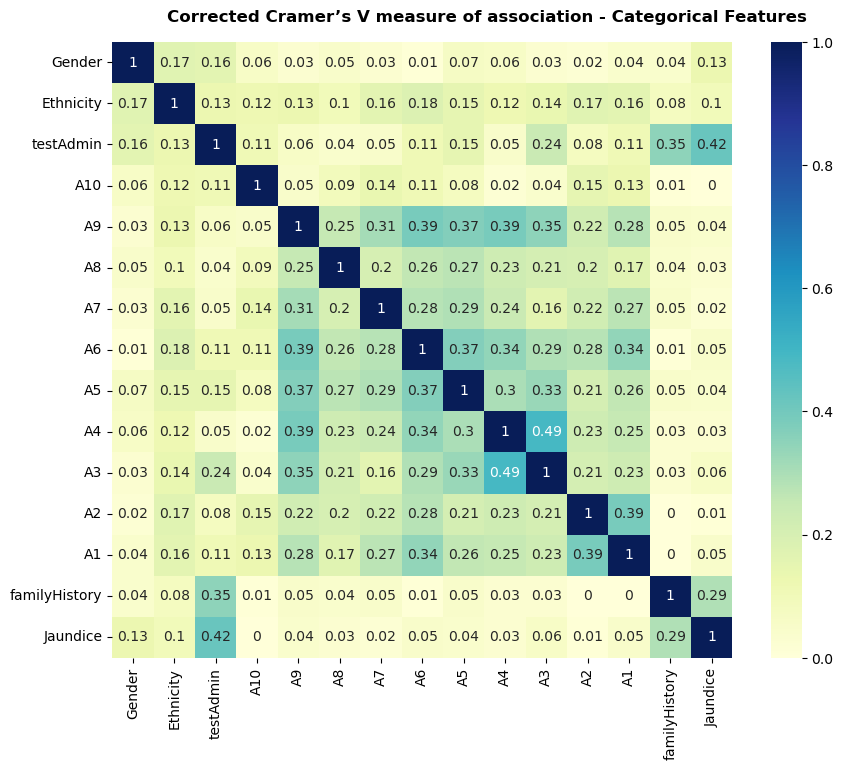

In [31]:
# Corrected Cramer’s V measure of association - Categorical Variables

from scipy.stats.contingency import association

rows= []

for var1 in df_child[cols]:
    col = []
    for var2 in df_child[cols]:
        crosstab =np.array(pd.crosstab(df_child[var1], df_child[var2], rownames=None, colnames=None))
        col.append(round(association(np.array(crosstab), method="cramer"),2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
    
cramers_results = np.array(rows)
results = pd.DataFrame(cramers_results, columns= cols, index= cols)

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(results, annot=True, cmap='YlGnBu')
fig.suptitle('Corrected Cramer’s V measure of association - Categorical Features', fontweight='bold', y=0.92)

Separate training data into features (X) and label (y)

In [32]:
X= df_child.drop(['ASD'], axis= 1)
y= df_child['ASD']

print(X.shape, y.shape)

(2016, 15) (2016,)


#### Data Preprocessing

In [33]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer

from sklearn.feature_selection import GenericUnivariateSelect, SelectKBest, RFE, SequentialFeatureSelector
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV,RandomizedSearchCV, train_test_split

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, StackingClassifier

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, recall_score, accuracy_score, f1_score

from sklearn import set_config

from xgboost import XGBClassifier, XGBRFClassifier

from imblearn.pipeline import Pipeline as imb_pipeline
from imblearn.over_sampling import SMOTENC, SMOTE

We do not apply any data preprocessing as the dataset is clean. However, we have constructed a data pipeline keeping in mind future datasets.

In [34]:
# Put categorical feature names in col list
cols= X.select_dtypes(include= 'object').columns.to_list()
cols

['Gender',
 'Ethnicity',
 'testAdmin',
 'A10',
 'A9',
 'A8',
 'A7',
 'A6',
 'A5',
 'A4',
 'A3',
 'A2',
 'A1',
 'familyHistory',
 'Jaundice']

In [35]:
X.isnull().sum()

Gender            0
Ethnicity        40
testAdmin        40
A10               0
A9                0
A8                0
A7                0
A6                0
A5                0
A4                0
A3                0
A2                0
A1                0
familyHistory     0
Jaundice         41
dtype: int64

* We impute the missing values in Ethnicity, testAdmin, and Jaundice features with their most frequent values in their respective columns.
* We one-hot encode the categorical features

In [36]:
# Scaling, Imputing and One-Hot Encoding of categorical features
estimators= [
    ('imputer', SimpleImputer(strategy= "most_frequent")),
    ('one-hot', OneHotEncoder(handle_unknown= "ignore", sparse= False))
]
# Data Preprocess Pipeline
preprocess_pipe= Pipeline(steps= estimators)

In [37]:
from sklearn import set_config
set_config(display= 'diagram')

# displays HTML representation 
preprocess_pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('one-hot',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

#### Model Building

##### Some helper functions

We are planning to apply different models on the data. Since fitting and tuning models are a repetitive task, let's write some helper functions to make our lives easier.

In [38]:
def construct_pipeline(classifier, preprocessor):
    '''constructs pipeline object by combining a preprocessing stage and an estimator
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        
    Returns:
        pipeline object
    '''
    full_pipe= Pipeline([
                        ('preprocess', preprocessor),
                        ('clf', classifier )
                        ])
    return full_pipe
    
def train_model(classifier, preprocessor, X_train, y_train):
    '''Trains a model with on given preprocssing and classification stages
    Args:
        classifier: Estimator object
        preprocessor: Preprocessing transformer object
        X_train: Training data feature matrix
        y_train: Training data label vector
        
    Returns:
        trained model
    '''
    X_train, X_test, y_train, y_test= train_test_split(X, y,
                                                       test_size= 0.2,
                                                       stratify= y,
                                                       random_state= seed)
    
    full_pipe= construct_pipeline(classifier, preprocessor)
    full_pipe.fit(X_train, y_train)
    
    print("-------------------Metrics on training set --------------------------")
    y_train_pred = full_pipe.predict(X_train)
    print("F1 score on training set: ", f1_score(y_train, y_train_pred, average='macro'))
    print()
    print(classification_report(y_train, y_train_pred))

    
    print("-------------------Metrics on test set --------------------------")
    y_test_pred = full_pipe.predict(X_test)
    print("F1 score on test set: " ,f1_score(y_test, y_test_pred, average='macro'))
    print()
    print(classification_report(y_test, y_test_pred))
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
    
    return full_pipe

    
def tune_model(model,
               param_grid,
               X_train, y_train,
               cv= StratifiedShuffleSplit(n_splits = 10, 
                                          test_size= 0.2,
                                          random_state= seed)):
    '''Do hyper parameter tuning using RandomizedSearchCV strategy
    
    Args:
        model: Model to be tuned
        param_grid: dict of parameters
        X_train: Feature matrix
        y_train: Label matrix
        
    Returns: 
        best parameters
        best estimator
    '''
    search= RandomizedSearchCV(model, 
                          param_distributions= param_grid,
                          cv= cv,
                          scoring= 'f1_macro',
                          n_jobs= -1,
                          return_train_score= True
                        )
    search.fit(X_train, y_train)
    
    print("Best parameters: ", search.best_params_)
    print("-------------------Best model performance --------------------------")
    
    mean_train_score= search.cv_results_['mean_train_score'][search.best_index_]
    mean_test_score= search.cv_results_['mean_test_score'][search.best_index_]
    std_train_score= search.cv_results_['std_train_score'][search.best_index_]
    std_test_score= search.cv_results_['std_test_score'][search.best_index_]

    print(f"Score of the model on the train set:\n"
        f"{mean_train_score:.3f} +/- {std_train_score:.6f}")

    print(f"Score of the model on the test set:\n"
        f"{mean_test_score:.3f} +/- {std_test_score:.6f}")
    
    y_pred = search.best_estimator_.predict(X_train)
    print(classification_report(y_train, y_pred))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred)
    
    print("------------------------------------------------------------------")
    
    return search.best_estimator_

#### Creating the pipeline with Pre-processing steps and Dummy Classifier

##### Baseline models
Baseline models are necessary to access and compare performance of various models. We consider two approaches to construct a baseline.
1. A naive baseline with DummyClassifier which predicts majority class for all data
2. K Nearest Neighbour model - This model directly estimates $(y | x)$ based on the neighbourhood in feature space. 
3. A Gaussian Naive-Bayes Model

-------------------Metrics on training set --------------------------
F1 score on training set:  0.3985074626865672

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       544
           1       0.66      1.00      0.80      1068

    accuracy                           0.66      1612
   macro avg       0.33      0.50      0.40      1612
weighted avg       0.44      0.66      0.53      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.3988095238095238

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       136
           1       0.66      1.00      0.80       268

    accuracy                           0.66       404
   macro avg       0.33      0.50      0.40       404
weighted avg       0.44      0.66      0.53       404



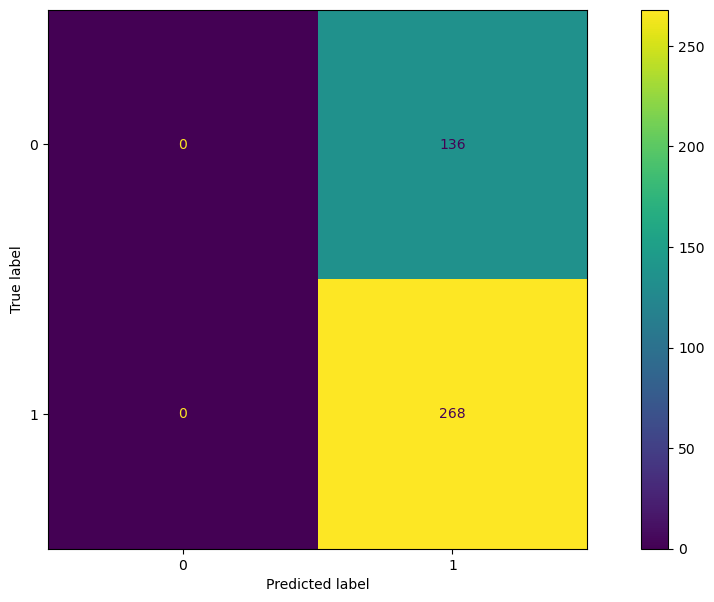

In [39]:
baseline_dummy_clf= DummyClassifier(random_state= seed)
baseline_dummy_clf_model= train_model(baseline_dummy_clf, preprocess_pipe, X, y)

##### Gaussian Naive Bayes Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.6736927498395233

              precision    recall  f1-score   support

           0       0.51      0.99      0.67       544
           1       0.99      0.51      0.67      1068

    accuracy                           0.67      1612
   macro avg       0.75      0.75      0.67      1612
weighted avg       0.83      0.67      0.67      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.6658231570949775

              precision    recall  f1-score   support

           0       0.50      0.98      0.66       136
           1       0.98      0.51      0.67       268

    accuracy                           0.67       404
   macro avg       0.74      0.74      0.67       404
weighted avg       0.82      0.67      0.67       404



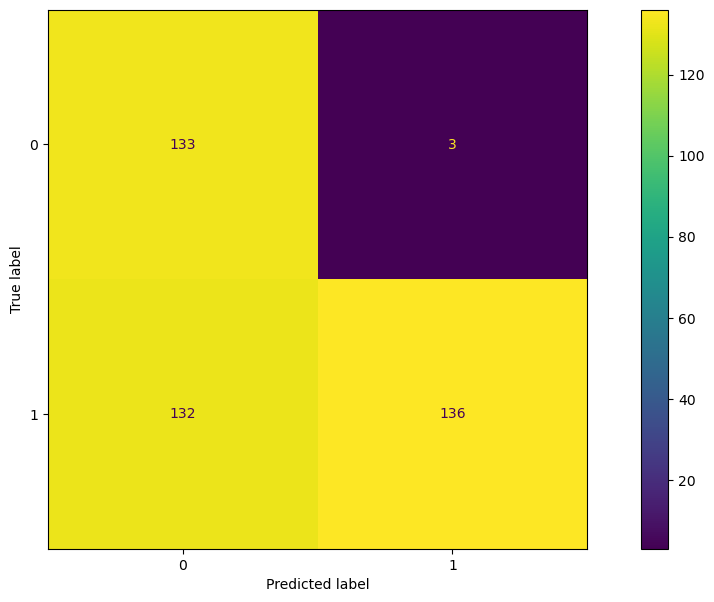

In [40]:
 baseline_gnb_clf= GaussianNB()
 baseline_gnb_clf_model= train_model(baseline_gnb_clf, preprocess_pipe, X, y)

##### KNN Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.947666302336403

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       544
           1       0.96      0.97      0.97      1068

    accuracy                           0.95      1612
   macro avg       0.95      0.95      0.95      1612
weighted avg       0.95      0.95      0.95      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9165634035522512

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       136
           1       0.94      0.95      0.94       268

    accuracy                           0.93       404
   macro avg       0.92      0.92      0.92       404
weighted avg       0.93      0.93      0.93       404



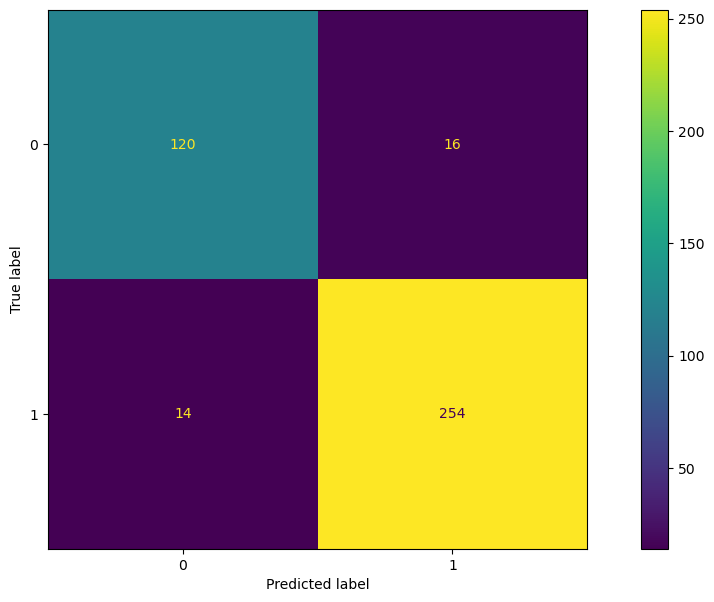

In [41]:
baseline_knn_clf= KNeighborsClassifier()
baseline_knn_clf_model= train_model(baseline_knn_clf, preprocess_pipe, X, y)

Tuning KNN Classifier

Best parameters:  {'clf__weights': 'uniform', 'clf__p': 2, 'clf__n_neighbors': 5}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.947 +/- 0.003644
Score of the model on the test set:
0.906 +/- 0.006933
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       680
           1       0.97      0.97      0.97      1336

    accuracy                           0.96      2016
   macro avg       0.95      0.95      0.95      2016
weighted avg       0.96      0.96      0.96      2016

------------------------------------------------------------------


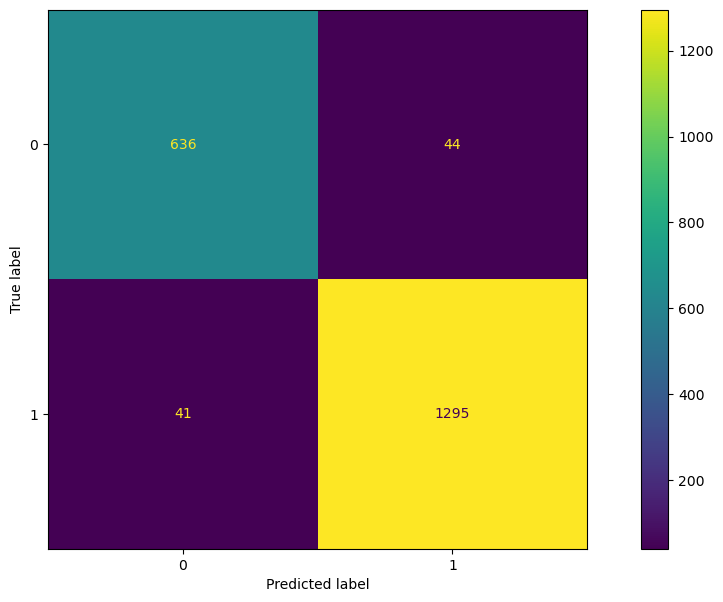

In [42]:
param_grid = {'clf__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
              'clf__weights': ['uniform','distance'], 
              'clf__p': [1,2]}
baseline_knn_clf_tuned= tune_model(baseline_knn_clf_model, param_grid, X, y)

##### Ridge Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9463704421529622

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       544
           1       0.97      0.95      0.96      1068

    accuracy                           0.95      1612
   macro avg       0.94      0.95      0.95      1612
weighted avg       0.95      0.95      0.95      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9346331202977105

              precision    recall  f1-score   support

           0       0.88      0.95      0.91       136
           1       0.97      0.94      0.95       268

    accuracy                           0.94       404
   macro avg       0.93      0.94      0.93       404
weighted avg       0.94      0.94      0.94       404



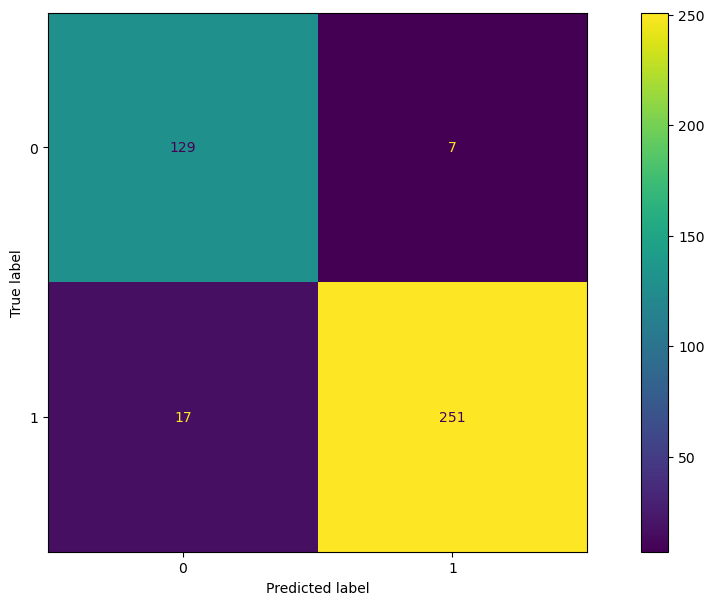

In [43]:
ridge_clf= RidgeClassifier(random_state= seed)
ridge_clf_model= train_model(ridge_clf, preprocess_pipe, X, y)

Tuning Ridge Classifier

Best parameters:  {'clf__alpha': 10}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.943 +/- 0.003299
Score of the model on the test set:
0.931 +/- 0.009417
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       680
           1       0.97      0.95      0.96      1336

    accuracy                           0.95      2016
   macro avg       0.94      0.95      0.94      2016
weighted avg       0.95      0.95      0.95      2016

------------------------------------------------------------------


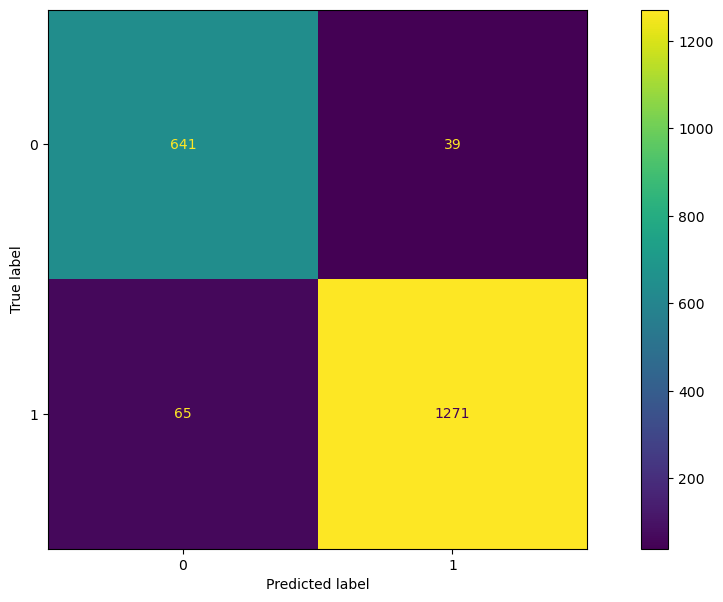

In [44]:
ridge_clf_pipe= construct_pipeline(ridge_clf, preprocess_pipe)
param_grid= {'clf__alpha': (0.001, 0.01, 0.1, 1, 10, 100)}
ridge_clf_model_tuned= tune_model(ridge_clf_pipe, param_grid, X, y)

##### Logisitic Regression

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9658403533422507

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       544
           1       0.97      0.98      0.98      1068

    accuracy                           0.97      1612
   macro avg       0.97      0.96      0.97      1612
weighted avg       0.97      0.97      0.97      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9806374311047208

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       136
           1       0.99      0.99      0.99       268

    accuracy                           0.98       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.98      0.98      0.98       404



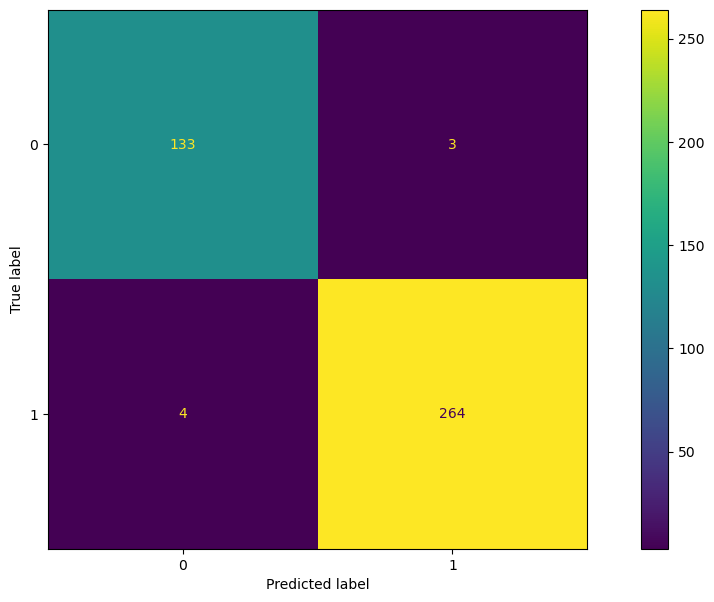

In [45]:
logreg_clf= LogisticRegression(random_state= seed, max_iter= 4000)
logreg_clf_model= train_model(logreg_clf, preprocess_pipe, X, y)

Best parameters:  {'clf__l1_ratio': 0.5, 'clf__C': 1}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.971 +/- 0.003187
Score of the model on the test set:
0.970 +/- 0.007610
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       680
           1       0.98      0.99      0.98      1336

    accuracy                           0.98      2016
   macro avg       0.98      0.97      0.97      2016
weighted avg       0.98      0.98      0.98      2016

------------------------------------------------------------------


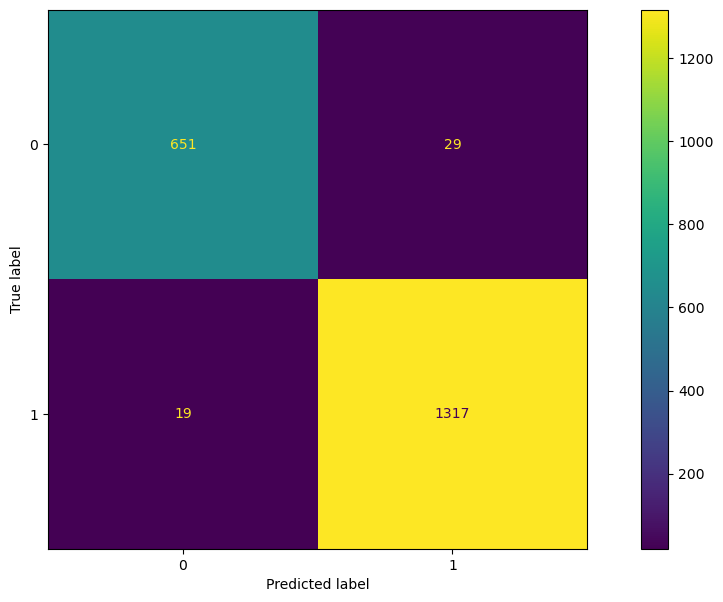

In [46]:
logreg_clf_pipe= construct_pipeline(LogisticRegression(
    penalty= 'elasticnet',
    solver='saga', 
    max_iter=4000,
    random_state= seed), 
    preprocess_pipe)

param_grid = {'clf__C': ( 0.001, 0.01, 0.1, 1, 10, 100),
             'clf__l1_ratio': (0, 0.1, 0.3, 0.5, 0.7, 0.9, 1)}
             
logreg_clf_model_tuned= tune_model(logreg_clf_pipe, param_grid, X, y)

##### SGD Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9735210868215795

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       544
           1       0.98      0.99      0.98      1068

    accuracy                           0.98      1612
   macro avg       0.98      0.97      0.97      1612
weighted avg       0.98      0.98      0.98      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.983433117362421

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.99      0.99       268

    accuracy                           0.99       404
   macro avg       0.98      0.99      0.98       404
weighted avg       0.99      0.99      0.99       404



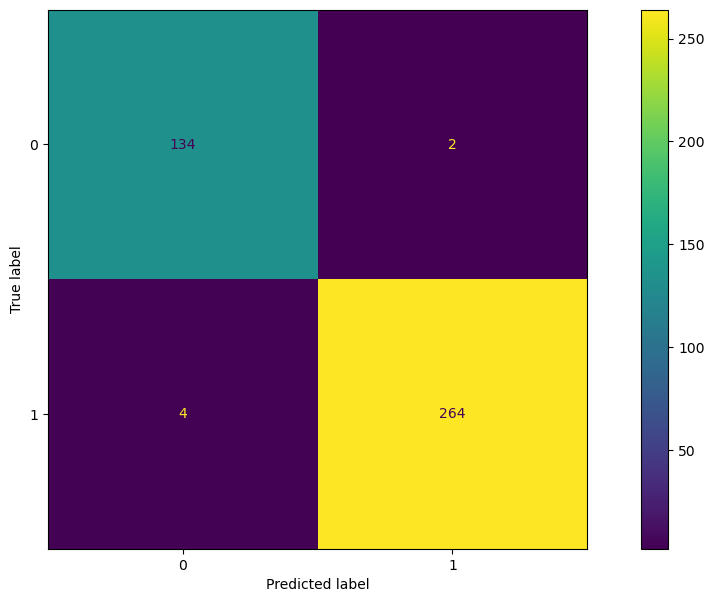

In [47]:
sgd_clf= SGDClassifier(random_state= seed)
sgd_clf_model= train_model(sgd_clf, preprocess_pipe, X, y)

Tuning SGD Classifier

/home/soumya/anaconda3/envs/data_science/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/soumya/anaconda3/envs/data_science/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/soumya/anaconda3/envs/data_science/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/soumya/anaconda3/envs/data_science/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing ma

Best parameters:  {'clf__penalty': 'l2', 'clf__max_iter': 10000, 'clf__loss': 'hinge', 'clf__alpha': 0.001}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.981 +/- 0.002006
Score of the model on the test set:
0.981 +/- 0.006067
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       680
           1       0.98      1.00      0.99      1336

    accuracy                           0.98      2016
   macro avg       0.99      0.98      0.98      2016
weighted avg       0.98      0.98      0.98      2016

------------------------------------------------------------------


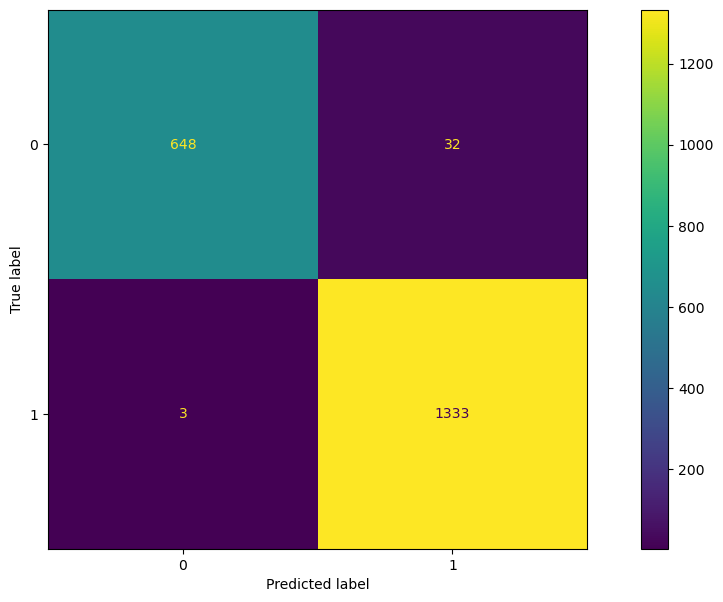

In [48]:
sgd_clf_pipe= construct_pipeline(SGDClassifier(random_state= seed), preprocess_pipe)
param_grid= {
            'clf__loss':['modified_huber','squared_error','hinge'], 'clf__penalty':['l1','l2'],
            'clf__alpha':[0.1,0.01,0.001],
            'clf__max_iter':[10000]}
sgd_clf_model_tuned= tune_model(sgd_clf_pipe, param_grid, X, y)

##### SVM Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9818151840956622

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       544
           1       0.98      1.00      0.99      1068

    accuracy                           0.98      1612
   macro avg       0.99      0.98      0.98      1612
weighted avg       0.98      0.98      0.98      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9718694295900179

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       136
           1       0.97      1.00      0.98       268

    accuracy                           0.98       404
   macro avg       0.98      0.97      0.97       404
weighted avg       0.98      0.98      0.98       404



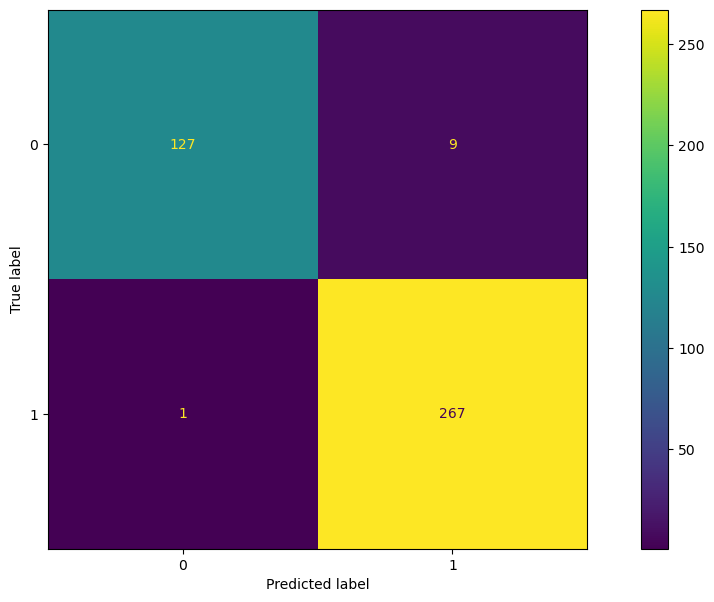

In [49]:
svm_clf= SVC(random_state= seed)
svm_clf_model= train_model(svm_clf, preprocess_pipe, X, y)

Tuning SVM Classifier

Best parameters:  {'clf__kernel': 'linear', 'clf__C': 400}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.979 +/- 0.011859
Score of the model on the test set:
0.983 +/- 0.006173
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       680
           1       0.89      0.93      0.91      1336

    accuracy                           0.88      2016
   macro avg       0.87      0.86      0.86      2016
weighted avg       0.88      0.88      0.88      2016

------------------------------------------------------------------


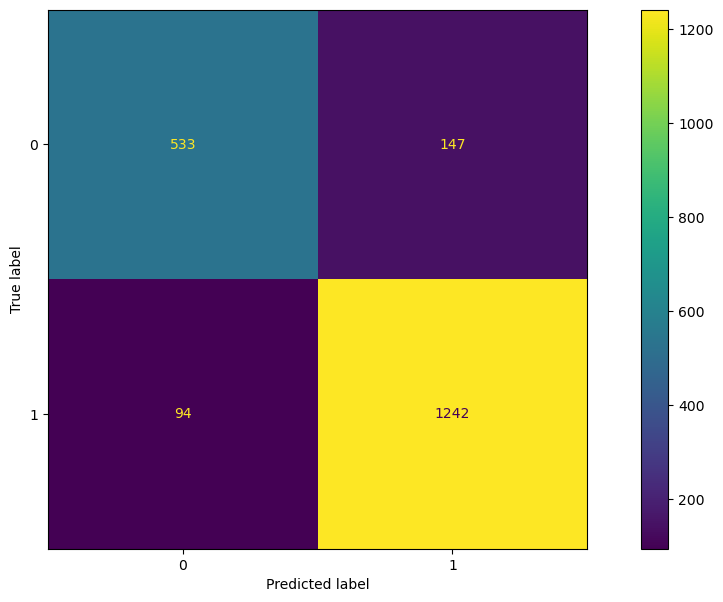

In [50]:
svm_clf_pipe= construct_pipeline(SVC(max_iter=10000, random_state= seed), preprocess_pipe)
param_grid= {
             'clf__C':[0.001, 0.01, 1, 10, 100, 200, 400, 600, 800, 1000],
             'clf__kernel':['linear','rbf']
            }
svm_clf_model_tuned= tune_model(svm_clf_pipe, param_grid, X, y)

##### Decision Tree Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9993066711397561

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      1612
   macro avg       1.00      1.00      1.00      1612
weighted avg       1.00      1.00      1.00      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9282101752371579

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       136
           1       0.95      0.95      0.95       268

    accuracy                           0.94       404
   macro avg       0.93      0.93      0.93       404
weighted avg       0.94      0.94      0.94       404



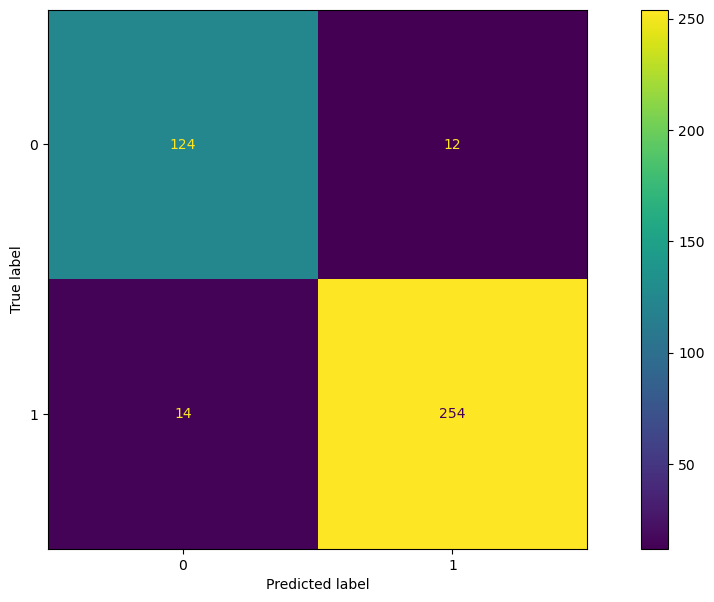

In [51]:
dtree_clf= DecisionTreeClassifier(random_state= seed)
dtree_clf_model= train_model(dtree_clf, preprocess_pipe, X, y)

Tuning Decision Tree Classifier

Best parameters:  {'clf__splitter': 'best', 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 30, 'clf__criterion': 'entropy'}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.945 +/- 0.004854
Score of the model on the test set:
0.874 +/- 0.016538
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       680
           1       0.97      0.96      0.97      1336

    accuracy                           0.96      2016
   macro avg       0.95      0.96      0.95      2016
weighted avg       0.96      0.96      0.96      2016

------------------------------------------------------------------


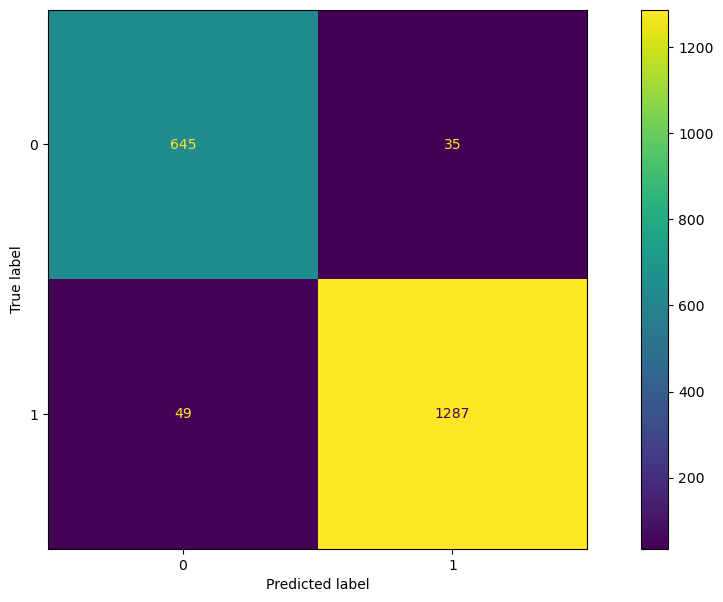

In [52]:
dtree_clf_pipe= construct_pipeline(dtree_clf, preprocess_pipe)

param_grid=  {'clf__criterion':['gini', 'entropy'],
             'clf__splitter':['best', 'random'],
              'clf__max_depth':[5, 8, 15, 25, 30, None],
              'clf__min_samples_leaf':[1, 2, 5, 8, 10],
              'clf__min_samples_split':[2, 6, 10, 20, 40, 80, 100, 120],
              'clf__max_features':[2, 5, 10, 'sqrt', 'log2', None]}

dtree_clf_model_tuned= tune_model(dtree_clf_pipe, param_grid, X, y)

##### Prevent overfitting in Decision Trees using Bagging Classifiers

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9993060455401157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      1612
   macro avg       1.00      1.00      1.00      1612
weighted avg       1.00      1.00      1.00      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9432902863559798

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       136
           1       0.94      0.99      0.96       268

    accuracy                           0.95       404
   macro avg       0.96      0.93      0.94       404
weighted avg       0.95      0.95      0.95       404



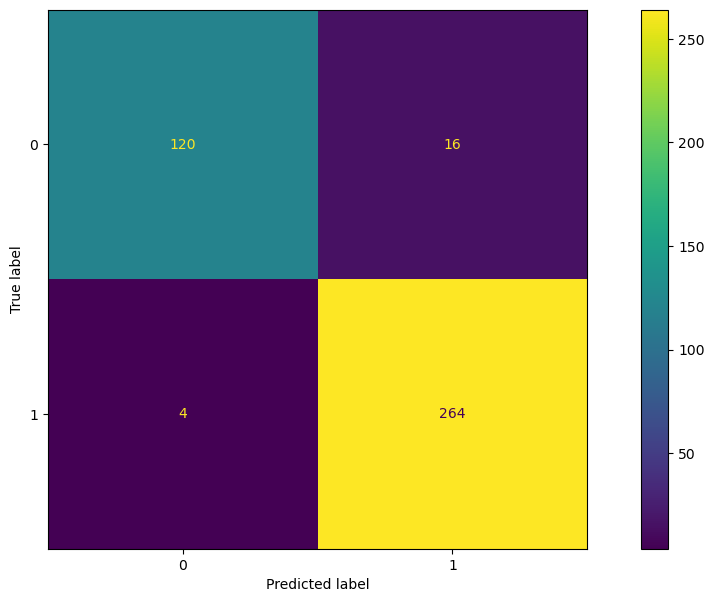

In [53]:
bag_clf= BaggingClassifier(
                           DecisionTreeClassifier(criterion= 'gini',
                                                 max_depth= 25,
                                                 max_features= 5,
                                                 min_samples_leaf= 1,
                                                 min_samples_split= 2,
                                                 splitter= 'random'),
                            n_estimators= 1000,
                            bootstrap= True,
                            max_samples= 1.0,
                            n_jobs= -1,
                            oob_score= True,
                            random_state= seed
                           )
                            
bag_clf_model= train_model(bag_clf, preprocess_pipe, X, y)

##### Random Forest Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9993060455401157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      1612
   macro avg       1.00      1.00      1.00      1612
weighted avg       1.00      1.00      1.00      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9489612577203819

              precision    recall  f1-score   support

           0       0.98      0.89      0.93       136
           1       0.95      0.99      0.97       268

    accuracy                           0.96       404
   macro avg       0.96      0.94      0.95       404
weighted avg       0.96      0.96      0.95       404



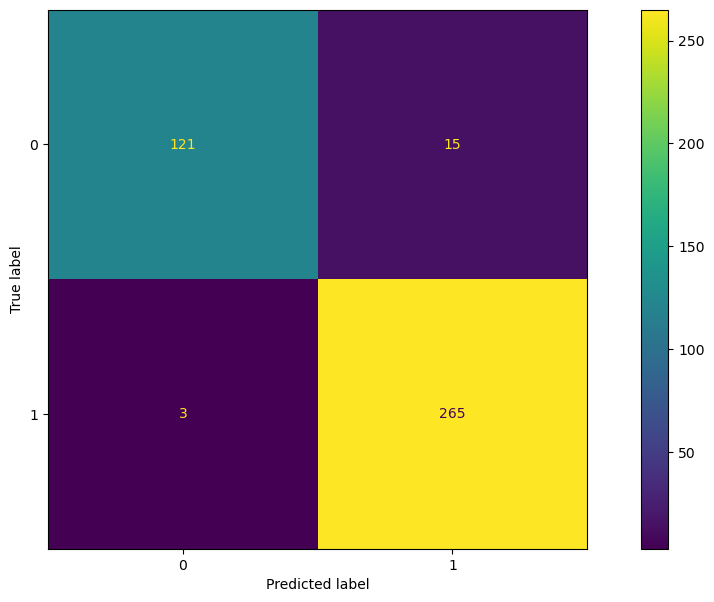

In [54]:
rf_clf= RandomForestClassifier(random_state= seed)
rf_clf_model= train_model(rf_clf, preprocess_pipe, X, y)

Tuning Random Forest Classifier

Best parameters:  {'clf__n_estimators': 711, 'clf__min_samples_split': 15, 'clf__min_samples_leaf': 2, 'clf__max_features': 'sqrt', 'clf__max_depth': 30, 'clf__criterion': 'gini'}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.972 +/- 0.001514
Score of the model on the test set:
0.931 +/- 0.015175
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       680
           1       0.97      0.99      0.98      1336

    accuracy                           0.98      2016
   macro avg       0.98      0.97      0.97      2016
weighted avg       0.98      0.98      0.98      2016

------------------------------------------------------------------


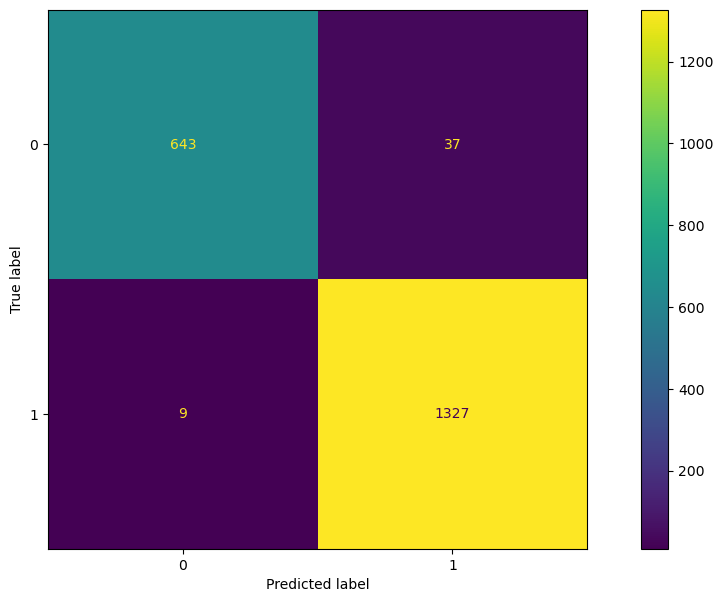

In [55]:
rf_clf_pipe= construct_pipeline(rf_clf, preprocess_pipe)
param_grid= {'clf__n_estimators':[int(x) for x in np.linspace(100,1200,10)],
             'clf__criterion':['gini','entropy'],
             'clf__max_depth':[5,8,15,25,30],
             'clf__min_samples_leaf':[1,2,5,10],
             'clf__min_samples_split':[1,2,5,10,15,100],
             'clf__max_features':['log2','sqrt',None]}
 
rf_clf_model_tuned= tune_model(rf_clf_pipe, param_grid, X, y)

In [56]:
from sklearn.inspection import permutation_importance
fs_pi= permutation_importance(rf_clf_model_tuned,
                               X, y,
                               n_repeats= 30,
                               n_jobs= -1,
                               random_state= seed,
                               scoring= 'f1_micro')

<Figure size 4000x4000 with 0 Axes>

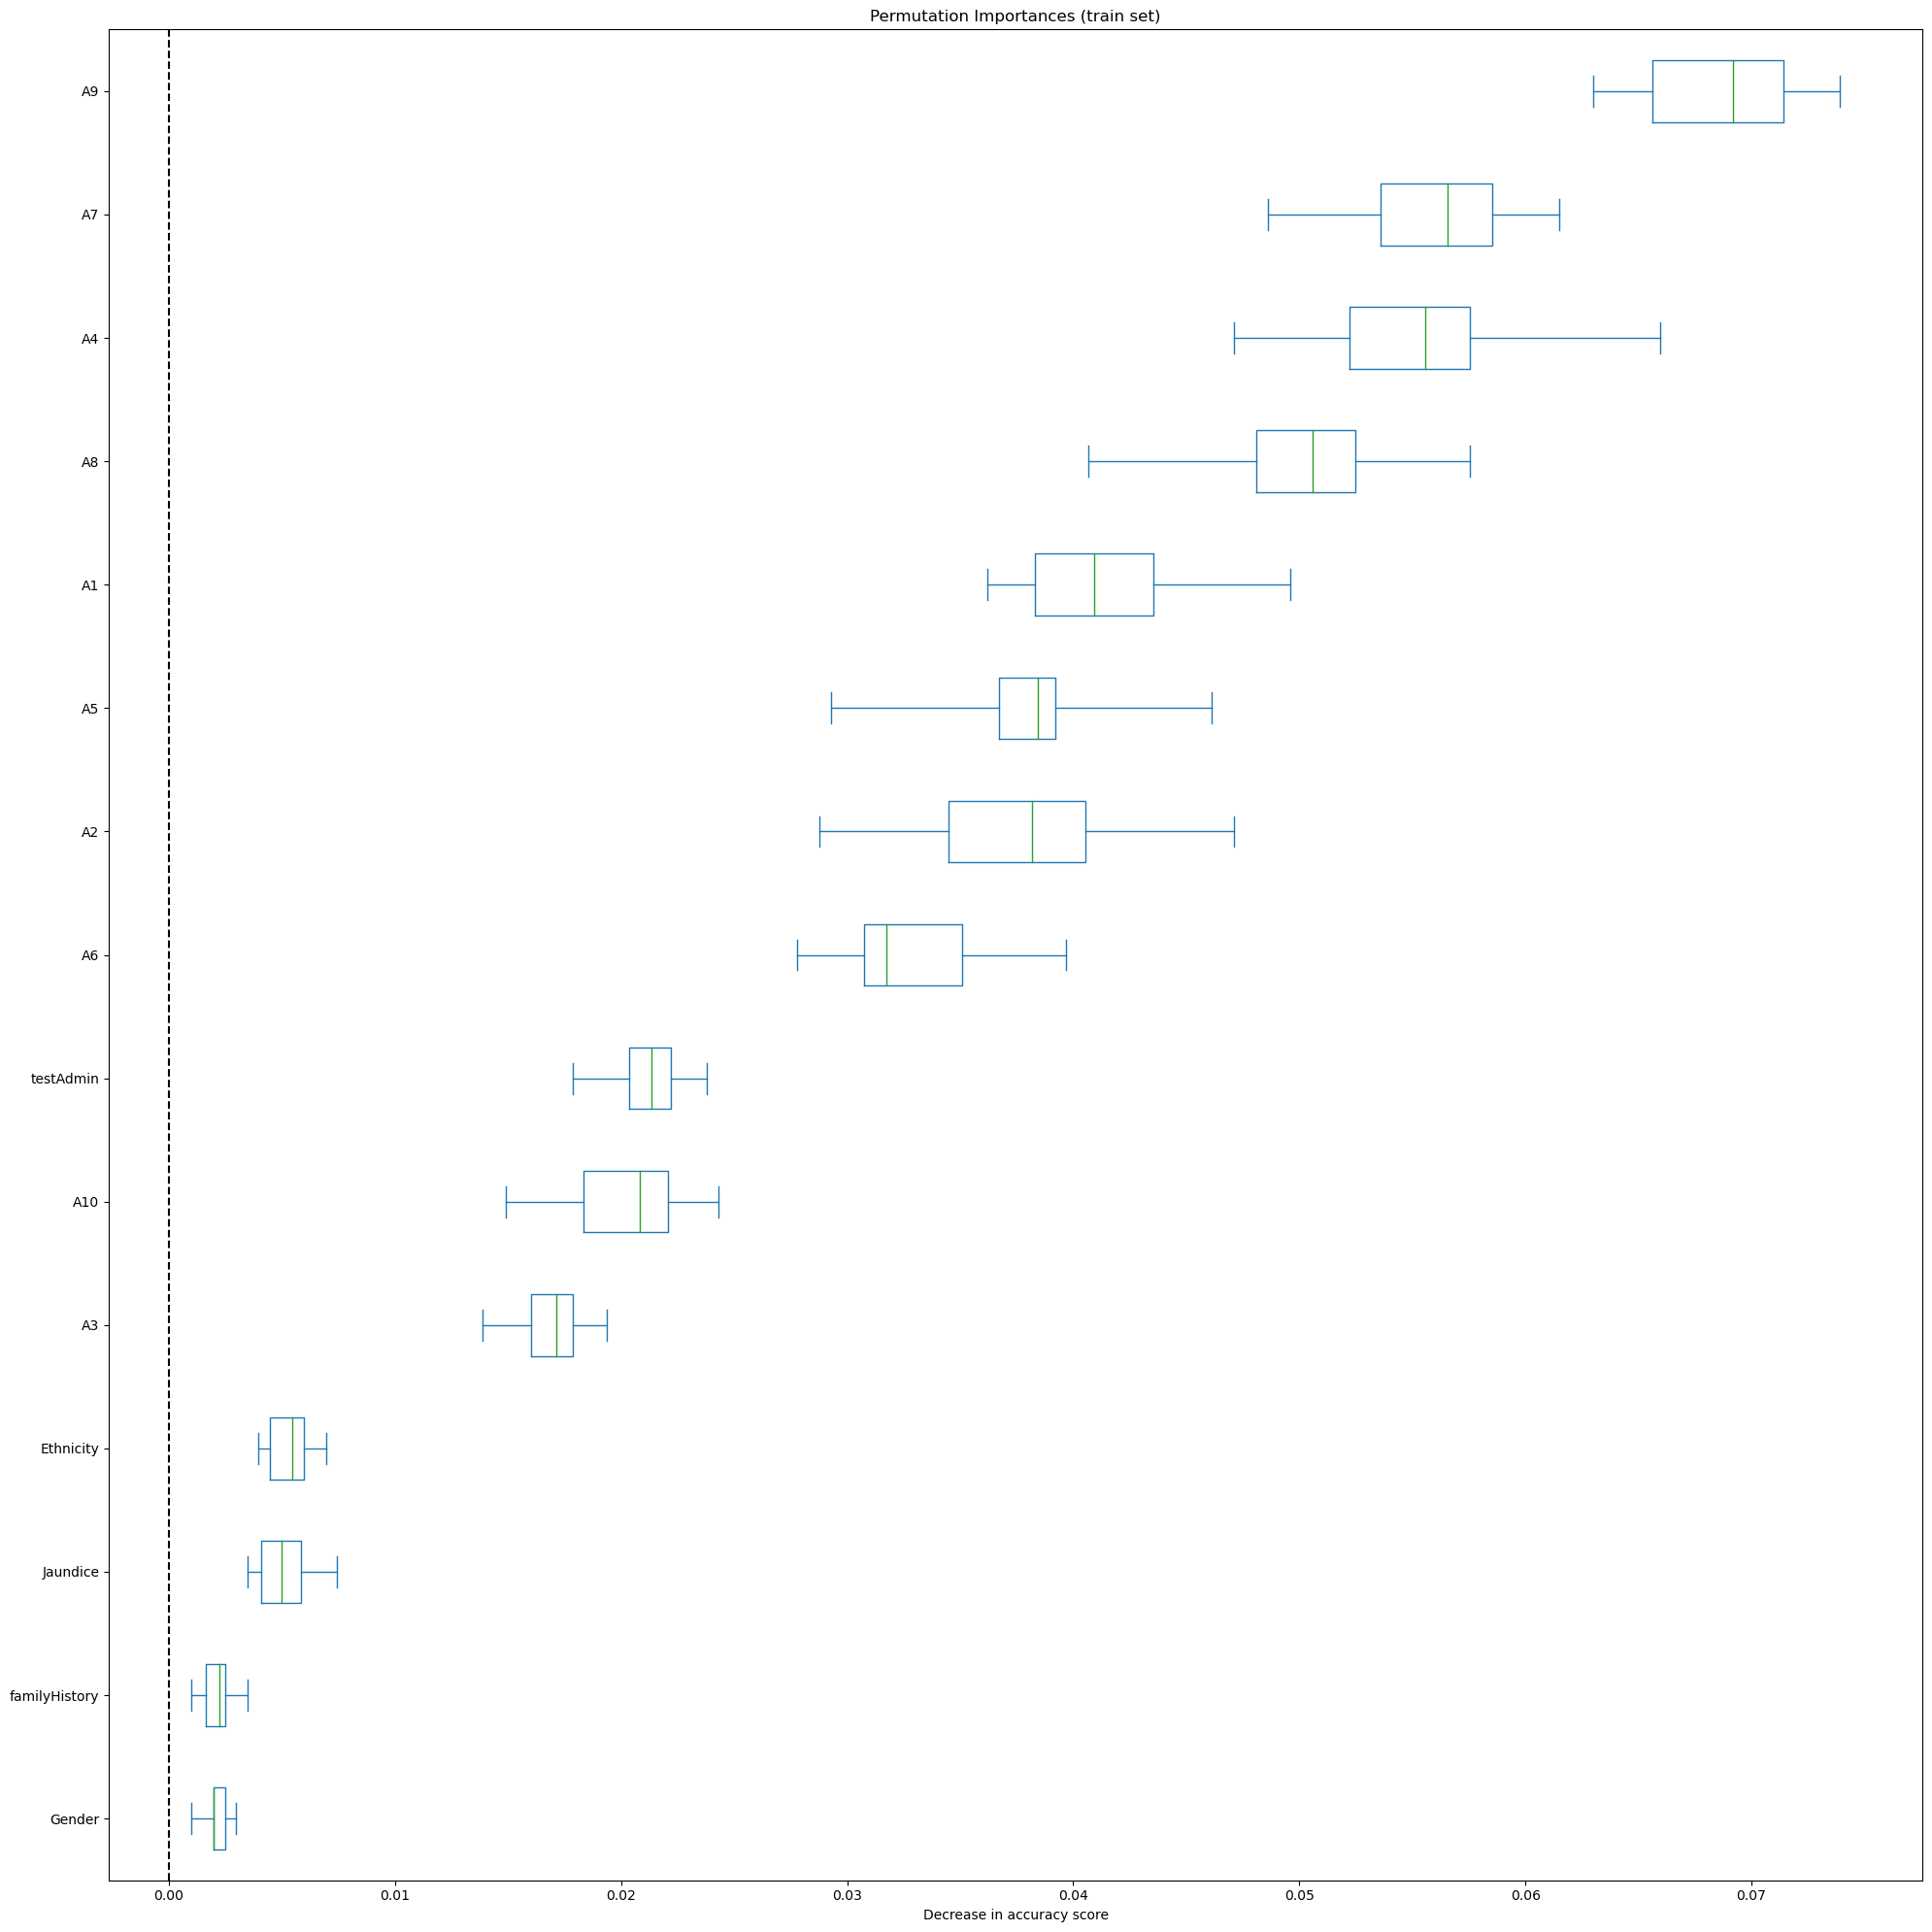

In [57]:
sorted_importances_idx = fs_pi.importances_mean.argsort()
importances = pd.DataFrame(
    fs_pi.importances[sorted_importances_idx].T,
    columns=X.columns[sorted_importances_idx],
)
plt.figure(figsize=(40, 40))
ax = importances.plot.box(vert=False, whis=10, figsize=(20, 20))
ax.set_title("Permutation Importances (train set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()

##### Extra Trees Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9993066711397561

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      1612
   macro avg       1.00      1.00      1.00      1612
weighted avg       1.00      1.00      1.00      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9518936448899256

              precision    recall  f1-score   support

           0       0.98      0.90      0.93       136
           1       0.95      0.99      0.97       268

    accuracy                           0.96       404
   macro avg       0.96      0.94      0.95       404
weighted avg       0.96      0.96      0.96       404



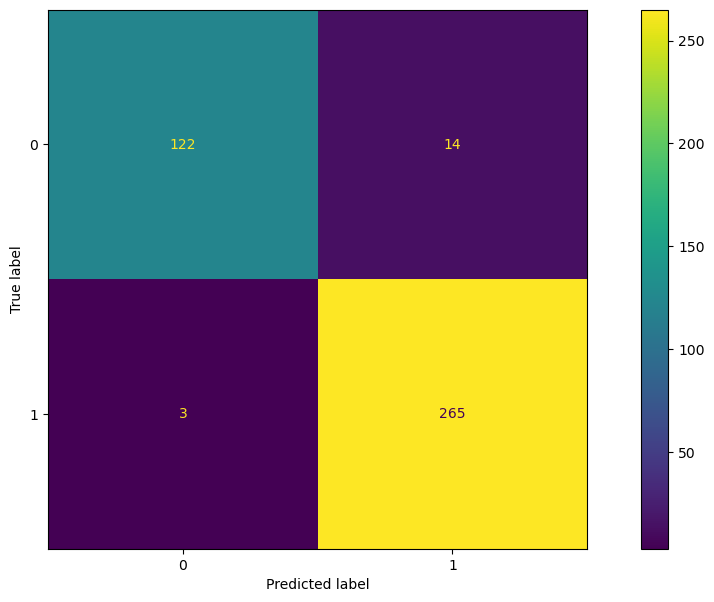

In [58]:
et_clf= ExtraTreesClassifier(random_state= seed)
et_clf_model= train_model(et_clf, preprocess_pipe, X, y)

Tuning Extra Trees Classifier

Best parameters:  {'clf__n_estimators': 955, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 1, 'clf__max_features': 'log2', 'clf__max_depth': 8, 'clf__criterion': 'gini'}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.990 +/- 0.001604
Score of the model on the test set:
0.938 +/- 0.012114
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       680
           1       0.99      1.00      0.99      1336

    accuracy                           0.99      2016
   macro avg       0.99      0.98      0.99      2016
weighted avg       0.99      0.99      0.99      2016

------------------------------------------------------------------


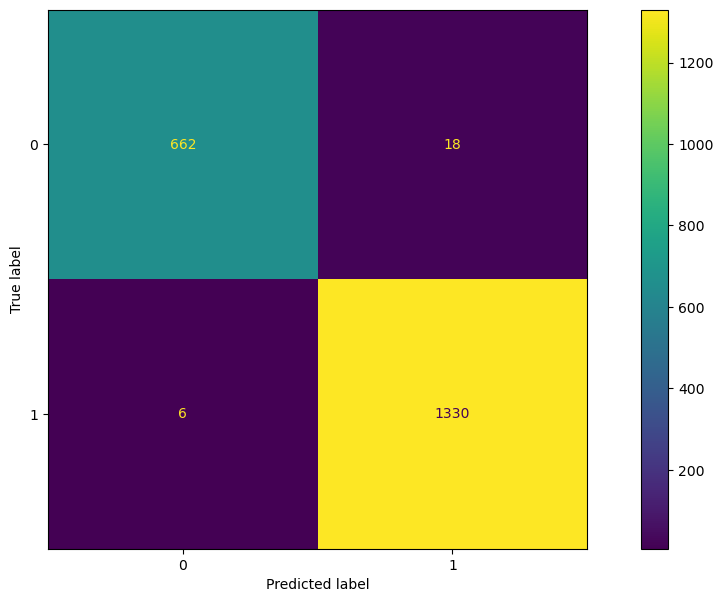

In [59]:
et_clf_pipe = construct_pipeline(et_clf, preprocess_pipe)
param_grid = {'clf__n_estimators':[int(x) for x in np.linspace(100,1200,10)],
             'clf__criterion':['gini','entropy'],
             'clf__max_depth':[5,8,15,25,30],
             'clf__min_samples_leaf':[1,2,5,10],
             'clf__min_samples_split':[1,2,5,10,15,100],
             'clf__max_features':['log2','sqrt',None]}
 
et_clf_model_tuned= tune_model(et_clf_pipe, param_grid, X, y)

##### AdaBoost Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.956955348021507

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       544
           1       0.97      0.97      0.97      1068

    accuracy                           0.96      1612
   macro avg       0.96      0.96      0.96      1612
weighted avg       0.96      0.96      0.96      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9616125967150808

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       136
           1       0.98      0.96      0.97       268

    accuracy                           0.97       404
   macro avg       0.96      0.97      0.96       404
weighted avg       0.97      0.97      0.97       404



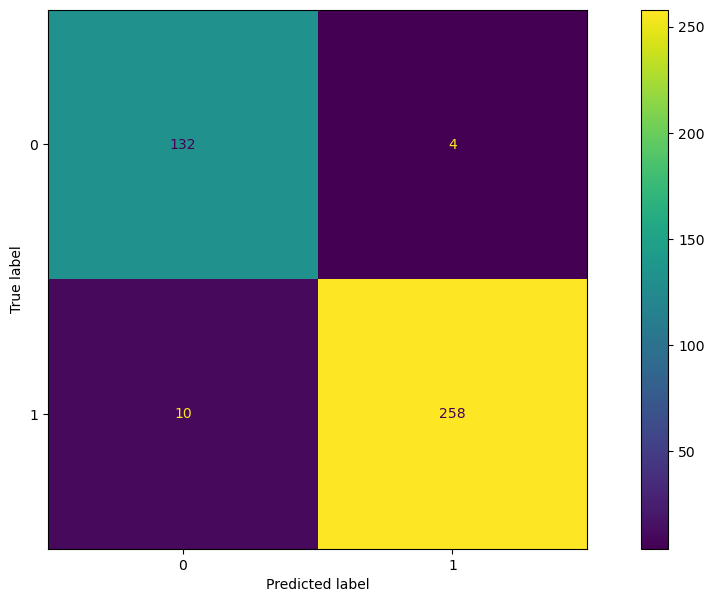

In [60]:
ada_clf= AdaBoostClassifier(random_state= seed)
ada_clf_model= train_model(ada_clf, preprocess_pipe, X, y)

Tuning AdaBoost Classifier

Best parameters:  {'clf__n_estimators': 75, 'clf__learning_rate': 1}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.960 +/- 0.002891
Score of the model on the test set:
0.957 +/- 0.009296
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       680
           1       0.98      0.97      0.97      1336

    accuracy                           0.96      2016
   macro avg       0.96      0.96      0.96      2016
weighted avg       0.96      0.96      0.96      2016

------------------------------------------------------------------


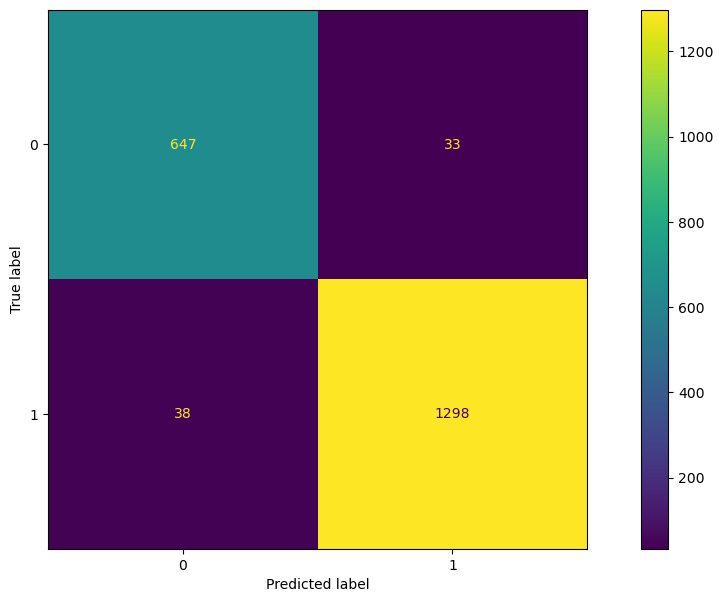

In [61]:
ada_clf_pipe= construct_pipeline(ada_clf, preprocess_pipe)
param_grid = {
            'clf__n_estimators': (50, 75, 100, 125, 150),
            'clf__learning_rate': (1e-3, 1e-2, 1e-1, 1)
            }
ada_clf_model_tuned= tune_model(ada_clf_pipe, param_grid, X, y)

##### GradBoost Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9804163521030207

              precision    recall  f1-score   support

           0       0.99      0.96      0.97       544
           1       0.98      1.00      0.99      1068

    accuracy                           0.98      1612
   macro avg       0.98      0.98      0.98      1612
weighted avg       0.98      0.98      0.98      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9662433155080213

              precision    recall  f1-score   support

           0       0.98      0.93      0.95       136
           1       0.96      0.99      0.98       268

    accuracy                           0.97       404
   macro avg       0.97      0.96      0.97       404
weighted avg       0.97      0.97      0.97       404



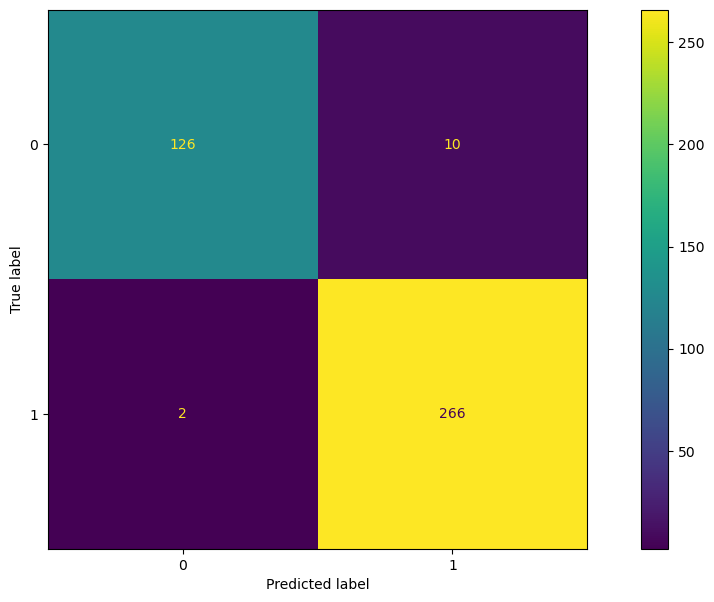

In [62]:
gradboost_clf= GradientBoostingClassifier(random_state= seed)
gradboost_clf_model= train_model(gradboost_clf, preprocess_pipe, X, y)

Tuning GradBoost Classifier

Best parameters:  {'clf__n_estimators': 50, 'clf__learning_rate': 1}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.999 +/- 0.000694
Score of the model on the test set:
0.964 +/- 0.006913
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00      1336

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

------------------------------------------------------------------


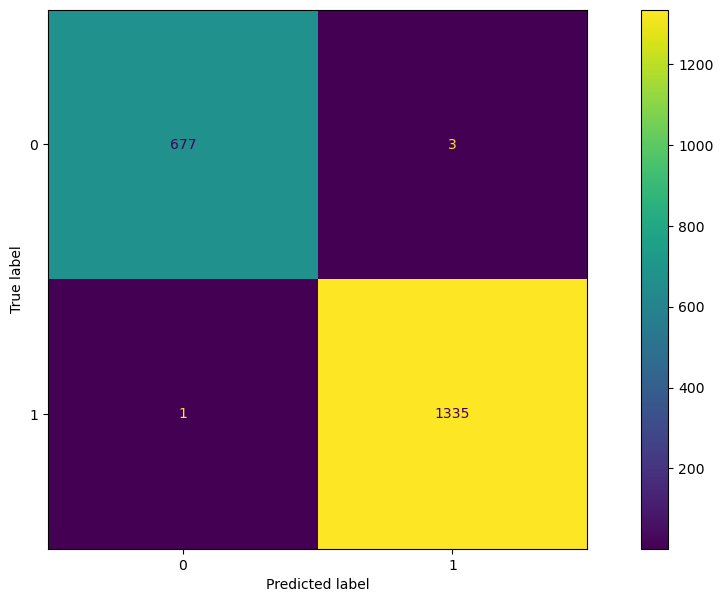

In [63]:
gradboost_clf_pipe = construct_pipeline(gradboost_clf, preprocess_pipe)
param_grid = {
             'clf__n_estimators': (50, 100, 150, 200),
             'clf__learning_rate': (1e-3, 1e-2, 1e-1, 1)
             }
gradboost_clf_model_tuned= tune_model(gradboost_clf_pipe, param_grid, X, y)

##### XGBoost Classifier

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9993060455401157

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00      1068

    accuracy                           1.00      1612
   macro avg       1.00      1.00      1.00      1612
weighted avg       1.00      1.00      1.00      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9720840243228304

              precision    recall  f1-score   support

           0       0.98      0.95      0.96       136
           1       0.97      0.99      0.98       268

    accuracy                           0.98       404
   macro avg       0.98      0.97      0.97       404
weighted avg       0.98      0.98      0.98       404



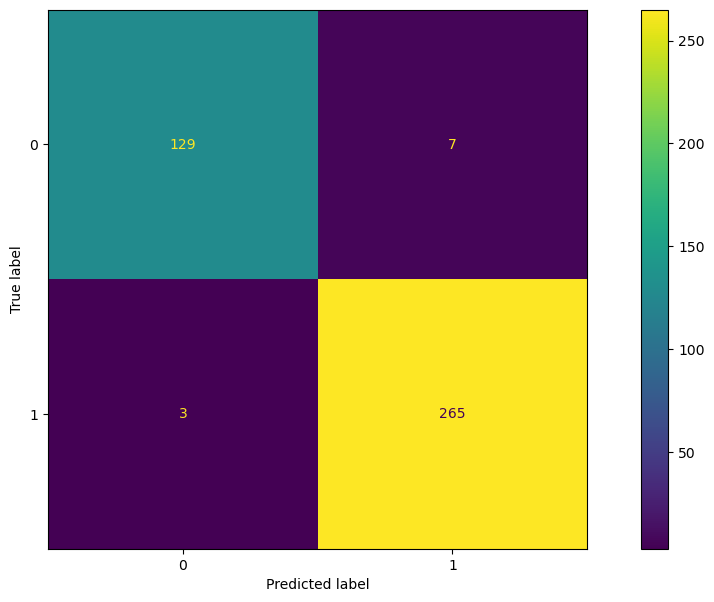

In [64]:
xgboost_clf= XGBClassifier(random_state= seed)
xgboost_clf_model= train_model(xgboost_clf, preprocess_pipe, X, y)

Tuning XGBoost Classifier

Best parameters:  {'clf__subsample': 0.7, 'clf__n_estimators': 900, 'clf__min_child_weight': 3, 'clf__max_depth': 12, 'clf__learning_rate': 0.05, 'clf__lambda': 0.1, 'clf__gamma': 0.1, 'clf__eta': 0.025, 'clf__colsample_bytree': 0.6, 'clf__alpha': 0}
-------------------Best model performance --------------------------
Score of the model on the train set:
0.995 +/- 0.000638
Score of the model on the test set:
0.968 +/- 0.006888
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       680
           1       1.00      1.00      1.00      1336

    accuracy                           1.00      2016
   macro avg       1.00      1.00      1.00      2016
weighted avg       1.00      1.00      1.00      2016

------------------------------------------------------------------


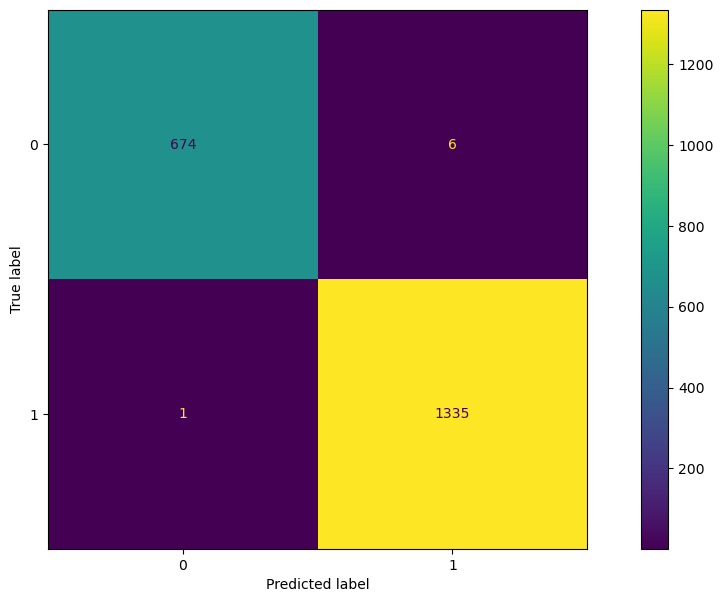

In [65]:
xgboost_clf_pipe = construct_pipeline(xgboost_clf, preprocess_pipe)
param_grid = {
             'clf__n_estimators': range(100, 1100, 100),
             'clf__learning_rate': (0.00001, 
                                    0.00005,
                                    0.0001,
                                    0.0005,
                                    0.001,
                                    0.005,
                                    0.01,
                                    0.05,
                                    0.1,
                                    0.2,
                                    0.5,
                                    1
                                   ),
             'clf__gamma': (0.05,
                          0.06,
                          0.07,
                          0.08,
                          0.09,
                          0.1,
                          0.3,
                          0.5,
                          0.7,
                          0.9,
                          1.0
                        ),
             'clf__eta': (0.01, 0.015, 0.025, 0.05, 0.1),
             'clf__max_depth': (3, 5, 7, 9, 12, 15, 17, 25),
             'clf__min_child_weight': (1, 3, 5, 7),
             'clf__subsample': (0.6, 0.7, 0.8, 0.9, 1.0),
             'clf__colsample_bytree': (0.6, 0.7, 0.8, 0.9, 1.0),
             'clf__lambda': (0.01,
                             0.02,
                             0.03,
                             0.04,
                             0.05,
                             0.06,
                             0.07,
                             0.08,
                             0.09,
                             0.1,
                             0.5,
                             1.0,
                             ),
             'clf__alpha': (0, 0,1, 0.5, 1.0)                                 
             }
xgboost_clf_model_tuned= tune_model(xgboost_clf_pipe, param_grid, X, y)

##### Stacking Classifier

In [66]:
estimators = [
    ('rf', rf_clf_model_tuned),
    ('xgb', xgboost_clf_model_tuned)
               
    ]

-------------------Metrics on training set --------------------------
F1 score on training set:  0.9937430537675589

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       544
           1       0.99      1.00      1.00      1068

    accuracy                           0.99      1612
   macro avg       0.99      0.99      0.99      1612
weighted avg       0.99      0.99      0.99      1612

-------------------Metrics on test set --------------------------
F1 score on test set:  0.9804953410901367

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       136
           1       0.98      0.99      0.99       268

    accuracy                           0.98       404
   macro avg       0.98      0.98      0.98       404
weighted avg       0.98      0.98      0.98       404



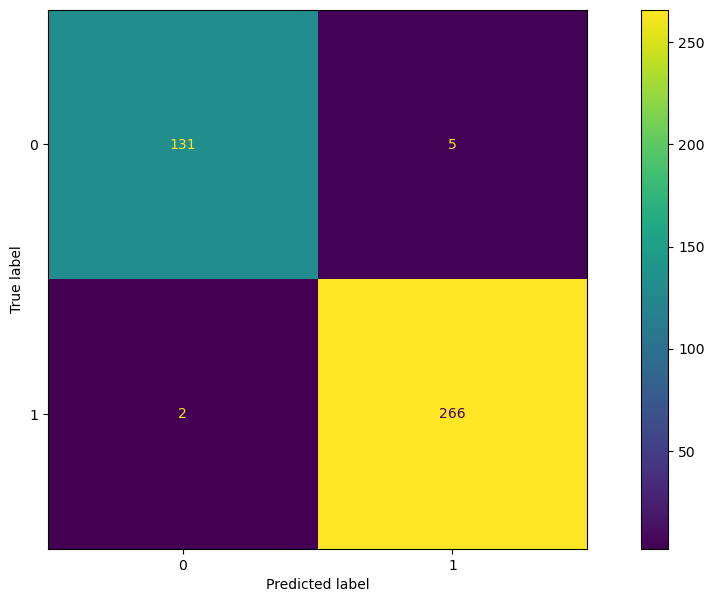

In [67]:
stack_clf= train_model(StackingClassifier(estimators=estimators, 
                                          final_estimator= LogisticRegression()),
                       preprocess_pipe,
                       X, y)

#### Model Performance Comparison (with Class Imbalance)

The following table summarises the result of the above models. The score reported is $F_1$ score(macro averaged).

* Without oversampling, the best performing models are __Linear SVM__ (98.3 %), __Stacking Classifier__ (with XGBoost, Random Forest Classifier and Log Reg as the final clf) (98 %)
 
| Model               | Train Score | Test Score |
| ------------------- | ----------- | ---------- |
| Dummy Classifier    | 0.398       | 0.399      |
| KNN Classifier      | 0.947       | 0.906      |
| GNB Classifier      | 0.674       | 0.667      |
| Ridge Classifier    | 0.943       | 0.931      |
| __Log. Reg.__       | 0.971       | __0.970__  |
| __SVM__             | 0.979       | __0.983__  |
| Decision Tree       | 0.995       | 0.874      |
| Bagging Classifier  | 0.999       | 0.943      |
| Random Forest       | 0.972       | 0.931      |
| Extra Trees Clf     | 0.990       | 0.938      |
| AdaBoost            | 0.960       | 0.957      |
| GradientBoost       | 0.999       | 0.964      |
| XGBoost Classifier  | 0.995       | 0.965      |
| __Stacking Clf__    | 0.993       | __0.980__  |